# Projet Fil Rouge :  Détection d'activité humaine - Machine Learning

**Nom du Groupe :**

**Noms :** Aussel - Cintas

**Prénoms :** Baptiste - Albin



Dans ce projet, nous essaierons de prédire l'activité humaine (1-Descendre, 2-Courir, 3-Assis, 4-Debout, 5-Monter ou 6-Marcher) en utilisant les capteurs du smartphone. C'est-à-dire qu'en utilisant les méthodes suivantes, le smartphone peut détecter ce que nous faisons en ce moment.


En utilisant l'accéléromètre  intégré dans le smartphone,  l'accélération linéaire 3-axes à un taux constant de 50Hz ont été relevées. Les expériences ont été enregistrées sur vidéo pour étiqueter les données manuellement. 

<img src="files/HARDataset.JPG" width="800" height="600"  >

Il est fourni pour chaque enregistrement de l'ensemble de données : 
- L'accélération triaxiale de l'accéléromètre (accélération totale)
- Son étiquette d'activité. 
- Un identifiant du sujet qui a réalisé l'expérience.


Ces 6 séances se décomposent en 6 parties : 
- Partie 0 : Familiarisation avec les données 
- Partie I : Sélection de variables et pénalisation
- Partie II : Classification par méthodes à noyau 
- Partie III : Apprentissage par ensemble : Adaboost, gradient boosting
- Partie IV : Classification par réseaux de neurones
- Partie V : Votre étude


**Travail à rendre**

Pour cela, vous devez :
1. Réaliser une étude sur le signal de l'accéléromètre et une avec leur représentation fréquentielle; 
2. Evaluer les résultats en utilisant la matrice de confusion et le pourcentage de bonne classification;
4. Classification par méthodes à noyau, réseaux de neurones, 
5. Rédiger un rapport en pdf présentant votre étude : les résultats par  méthode et vos commentaires, comparaisons et conclusions sur une étude plus générale en modifiant les tailles des ensembles de test et d'apprentissage, en changeant le nombre de classes  (Longeur max. : 10 pages).


**Dataset et description :**
https://archive.ics.uci.edu/ml/datasets/WISDM+Smartphone+and+Smartwatch+Activity+and+Biometrics+Dataset+





In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import math
import scipy as sc
import seaborn as sns

In [6]:
COLUMN_NAMES = [
    'user',
    'activity',
    'timestamp',
    'x-axis',
    'y-axis',
    'z-axis'
]

LABELS = [
    'Downstairs',
    'Jogging',
    'Sitting',
    'Standing',
    'Upstairs',
    'Walking'
]

DATA_PATH = './WISDM_ar_v1.1_raw.txt'


# Data preprocessing
TIME_STEP = 60

# Model
N_CLASSES = 3
N_FEATURES = 3  # x-acceleration, y-acceleration, z-acceleration
SEGMENT_TIME_SIZE = 30
TAILLE_TEST=40
TAILLE_APP=150

##  Création des données d'apprentissage et de test

Classe N° 0
Classe N° 1
Classe N° 2
(450, 90)
(120, 90)


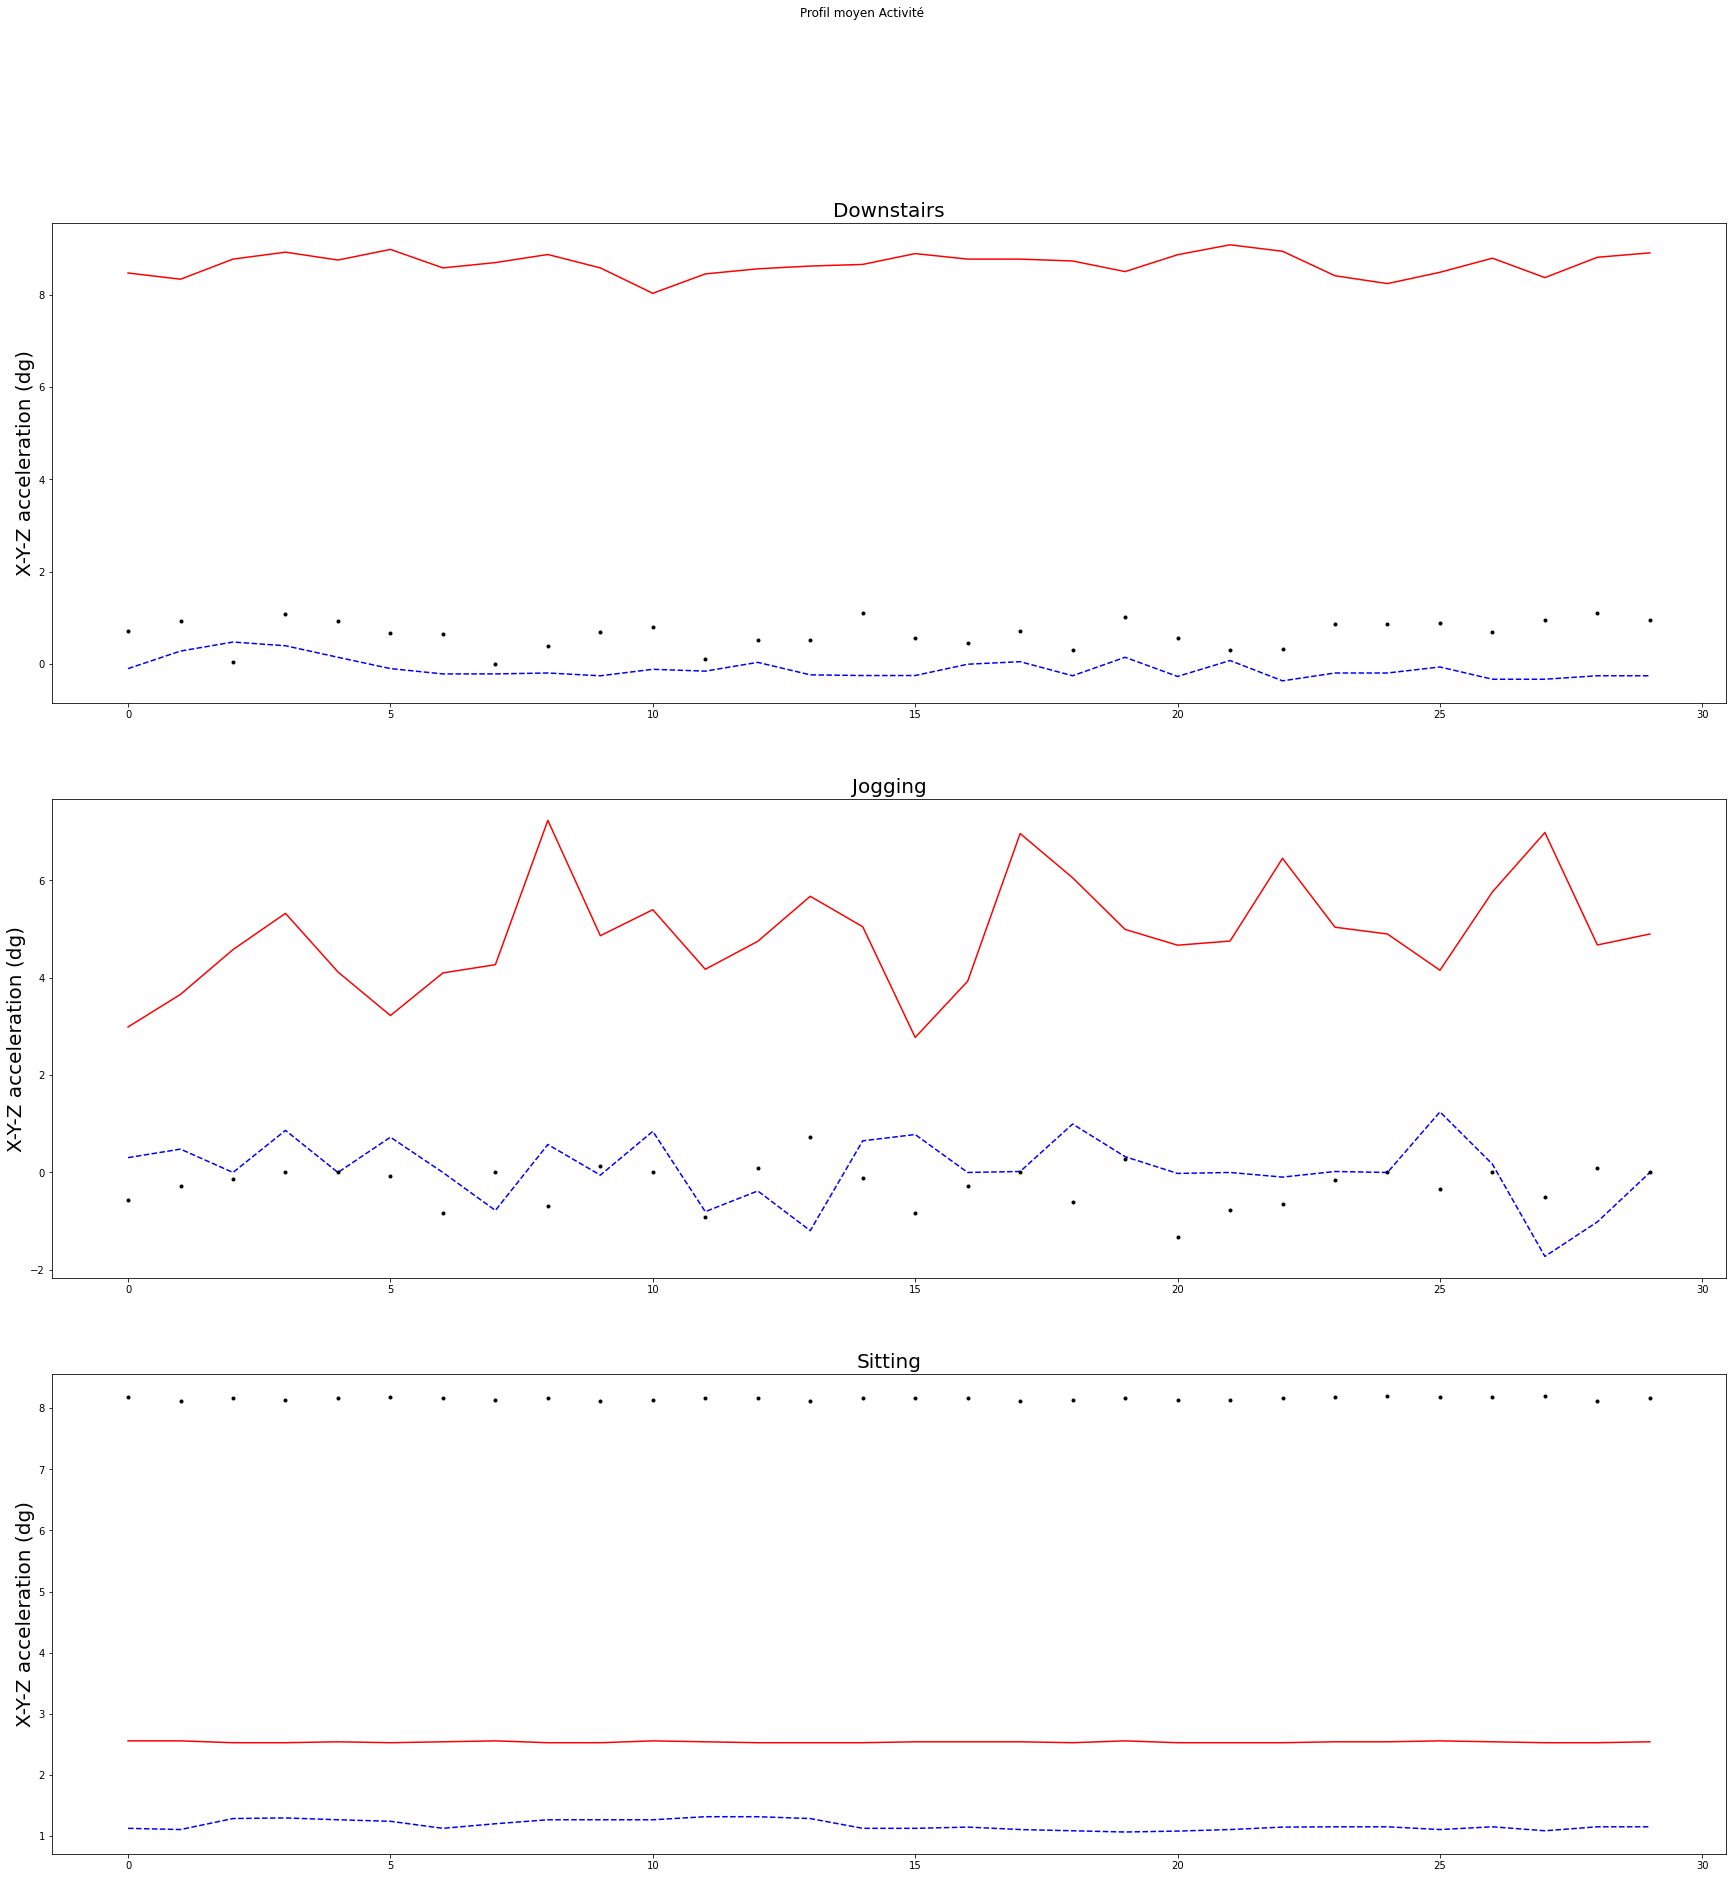

In [3]:

# Chargement des données 
data = pd.read_csv(DATA_PATH, header=None, names=COLUMN_NAMES)
data['z-axis'].replace({';': ''}, regex=True, inplace=True)
data = data.dropna()


data_convoluted = []
labels = []



# Prendre des segments temporels de taille SEGMENT_TIME_SIZE 
# tous les TIME_STEP pour une même activité
for j in range(0,N_CLASSES):
    DataBest=data[data['activity'] == LABELS[j]]
    for i in range(0, len(DataBest) - SEGMENT_TIME_SIZE, TIME_STEP):
        x = DataBest['x-axis'].values[i: i + SEGMENT_TIME_SIZE]
        y = DataBest['y-axis'].values[i: i + SEGMENT_TIME_SIZE]
        z = DataBest['z-axis'].values[i: i + SEGMENT_TIME_SIZE]
        data_convoluted.append([x, y, z])
    # Label de l'activité associée à chaque segment
        label = j
        labels.append(label)


# Conversion numpy
data_convoluted = np.asarray(data_convoluted, dtype=np.float32).transpose(0, 2, 1)

labels = np.asarray(labels, dtype=np.int)
#print("Convoluted data shape: ", data_convoluted.shape)
#print("Labels shape:", labels.shape)


fig, axs = plt.subplots(N_CLASSES,figsize=(30,30))
fig.suptitle('Profil moyen Activité')

profil_median=np.zeros((N_CLASSES,SEGMENT_TIME_SIZE,N_FEATURES))
List_Data_Test=np.zeros(N_CLASSES*TAILLE_TEST)
Data_Test=np.zeros((N_CLASSES*TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))
Data_App=np.zeros((TAILLE_APP*N_CLASSES,SEGMENT_TIME_SIZE*N_FEATURES))
Label_Test=np.zeros((N_CLASSES*TAILLE_TEST,1))
Label_App=np.zeros((N_CLASSES*TAILLE_APP,1))

for i in range(N_CLASSES):
    # Selection des données correspondant à la classe i
    print('Classe N°',i)
    res=np.where(labels==i)
    res=np.array(res)
    res=np.ravel(res)
    taille=res.shape[0]
    
    # Création de la base d'Apprentissage
    tirage=np.random.randint(0,taille,TAILLE_TEST+TAILLE_APP)
    tir_dataApp=data_convoluted[res[tirage[0:TAILLE_APP]],:,:]
    Data_App[i*TAILLE_APP:(i+1)*TAILLE_APP,:]=np.reshape(tir_dataApp,(TAILLE_APP,SEGMENT_TIME_SIZE*N_FEATURES))
    Label_App[i*TAILLE_APP:(i+1)*TAILLE_APP]=i
    
    
    # Création de la base de Test
    List_Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=res[tirage[TAILLE_APP:]]
    Label_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=i
    tir_dataTest=data_convoluted[res[tirage[TAILLE_APP:]],:,:]
    Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST,:]=np.reshape(tir_dataTest,(TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))

    # Affichage du profil temporel moyen de la classe
    class1=np.median(tir_dataApp,axis=0)
    profil_median[i,:,:]=class1
    
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,0],'b--')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,1],'r-')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,2],'k.')
    axs[i].set_ylabel('X-Y-Z acceleration (dg)',fontsize=20)
    axs[i].set_title(LABELS[i], fontsize=20)

print(Data_App.shape)

print(Data_Test.shape)

# Partie 0 : Familiarisation avec les données 

Il s'agit dans cette partie de ce familiariser avec les données en tracant différentes données caractéristiques comme la moyenne, la variance et la médiane. On peut même visualiser les données par une Analyse en composante principale.
Vous pouvez aussi considérer une représentation spectrale des données par une transformation de Fourier . 

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

print(data.info(),"\n\n",data.head(),"\n\n",data.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x-axis     1098203 non-null  float64
 4   y-axis     1098203 non-null  float64
 5   z-axis     1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.7+ MB
None 

    user activity       timestamp    x-axis     y-axis       z-axis
0    33  Jogging  49105962326000 -0.694638  12.680544   0.50395286
1    33  Jogging  49106062271000  5.012288  11.264028   0.95342433
2    33  Jogging  49106112167000  4.903325  10.882658  -0.08172209
3    33  Jogging  49106222305000 -0.612916  18.496431    3.0237172
4    33  Jogging  49106332290000 -1.184970  12.108489     7.205164 

                user     timestamp        x-axis        y-axis
count  1.09820

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64


<AxesSubplot:>

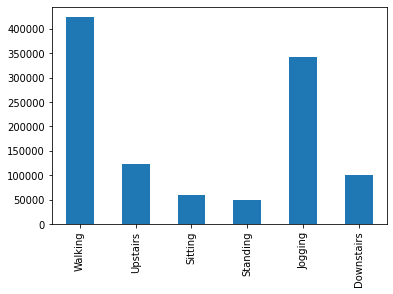

In [5]:
print(data.activity.value_counts())
data.activity.value_counts(sort=False).plot(kind='bar')

On remarque dans un premier temps que les données ne sont pas très bien équilibrées.

<AxesSubplot:>

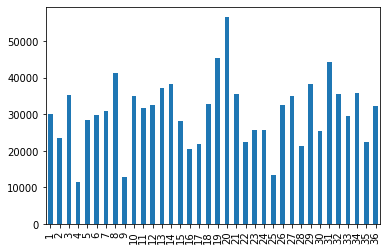

In [6]:
data.user.value_counts(sort=False).plot(kind='bar')

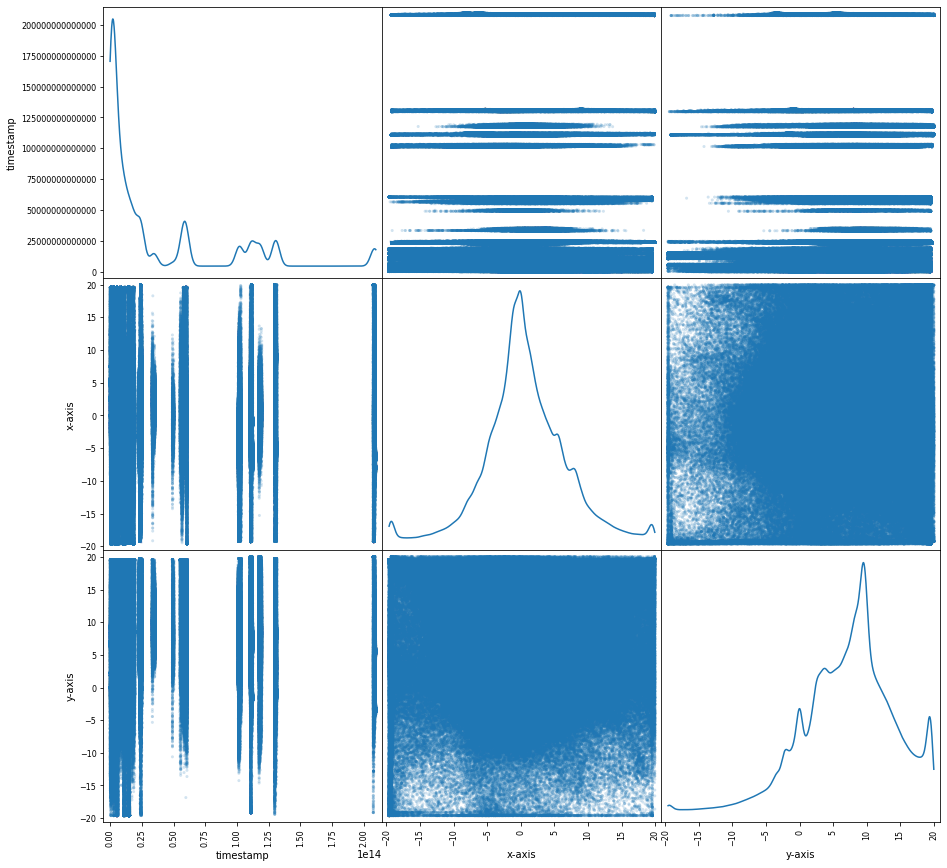

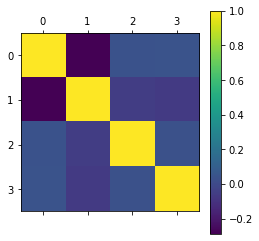

In [7]:
qualitative = ["activity","user"]
quantitative =data.columns.drop(qualitative)
qualitative = data.columns.drop(quantitative)
quantitative,qualitative

pd.plotting.scatter_matrix(data[quantitative], alpha=0.2, figsize=(15, 15), diagonal='kde')

plt.show()
plt.matshow(data.corr())

plt.colorbar()

On va désormais procéder à une ACP afin de réduire la dimension du problème et de pouvoir faire ainsi du clustering. 

In [ ]:
pca = PCA()
X= scale(Data_App)
comp = pca.fit(X).transform(X)

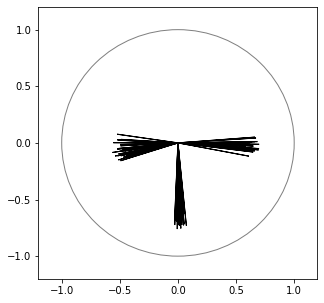

In [9]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j in zip(coord1,coord2):
    #plt.text(i, j,"ok")
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

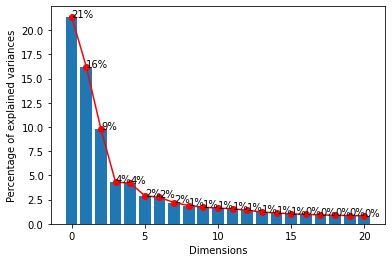

In [10]:
## Décroissance de la variance expliquée
X = np.arange(pca.explained_variance_ratio_.size)
plt.bar(X[:21],100 * pca.explained_variance_ratio_[:21])
PCA()
plt.plot(X[:21],100 * pca.explained_variance_ratio_[:21],"o",ls= "-",color = "red",)
plt.xlabel("Dimensions")
plt.ylabel("Percentage of explained variances")
for i in range (len(pca.explained_variance_ratio_[:21])):  
    plt.text(X[i],100 * pca.explained_variance_ratio_[i],str(int(100 * pca.explained_variance_ratio_[i])) + "%")
plt.show()


Le problème peut être simplifié en ne gardant que les 2 premières composantes. 

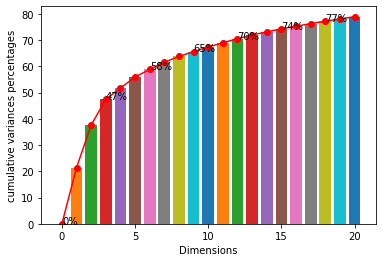

In [11]:
plt.xlabel("Dimensions")
plt.ylabel("cumulative variances percentages")
l =[]
for i in range (len(pca.explained_variance_ratio_[:21])):
    if i%3==0:
        plt.text(X[i],100 * sum(pca.explained_variance_ratio_[:i]),str(int(100 * sum(pca.explained_variance_ratio_[:i]))) + "%")     
    plt.bar(X[i],100 * sum(pca.explained_variance_ratio_[:i]))
    l+=[ 100 * sum(pca.explained_variance_ratio_[:i])]
plt.plot(X[:21],l,"o",ls= "-",color = "red",)
plt.show()

Nous pouvons alors tester l'algorithme KMeans afin d'essayer de classifier nos individus en fonction de leur activité. 

In [12]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
X = scale(Data_App)
clust=KMeans(n_clusters=3, random_state = 0)
clust.fit(X)
classe=clust.labels_

In [13]:
#fonction qui permet de réordonner les classes prédites par l'algorithme KMeans
a = classe[0]
b=6
c=7
classe_copy=classe.copy()
for i in range (len(classe)):
    d= classe[i]
    if d!= a and d!=b  and c==7:
        b=classe[i]
        c=4
        
    elif d!=a and d!=b and c==4:
        c = classe[i]
        
classe[classe_copy==a]=0
classe[classe_copy==b]=1
classe[classe_copy==c]=2

Dans un premier temps on analyse les classes sur les deux premières composantes de l'ACP.

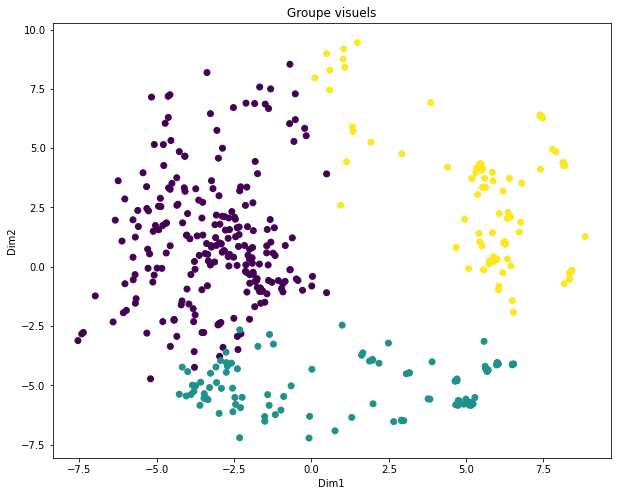

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(comp[:,0], comp[:,1], c=classe)#Label_App.ravel())
plt.title("Groupe visuels")
plt.ylabel("Dim2")
plt.xlabel("Dim1")
plt.show()

On va alors regarder nos résultats avec le KMeans : 

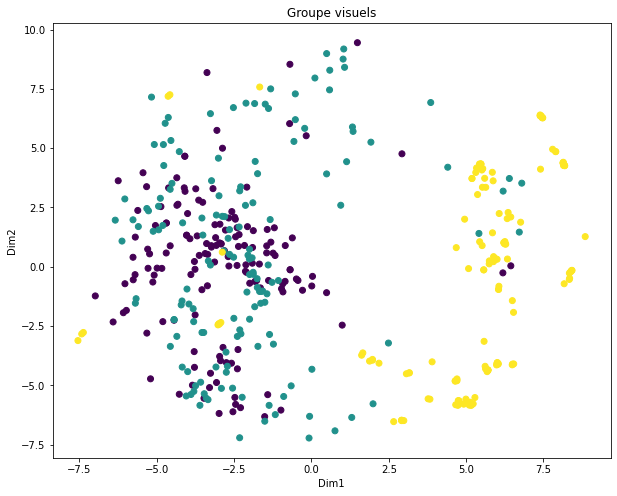

In [15]:

plt.figure(figsize=(10,8))
plt.scatter(comp[:,0], comp[:,1], c=Label_App.ravel())
plt.title("Groupe visuels")
plt.ylabel("Dim2")
plt.xlabel("Dim1")
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
print(confusion_matrix(Label_App, classe))
accuracy_score(Label_App, classe)

[[127  19   4]
 [ 96  35  19]
 [ 12  59  79]]


0.5355555555555556

On constate que l'algorithme KMeans n'est pas très efficace, surement du fait de la dimension trop élevée du problème.  
On va alors tester un clustering hierarchique : 

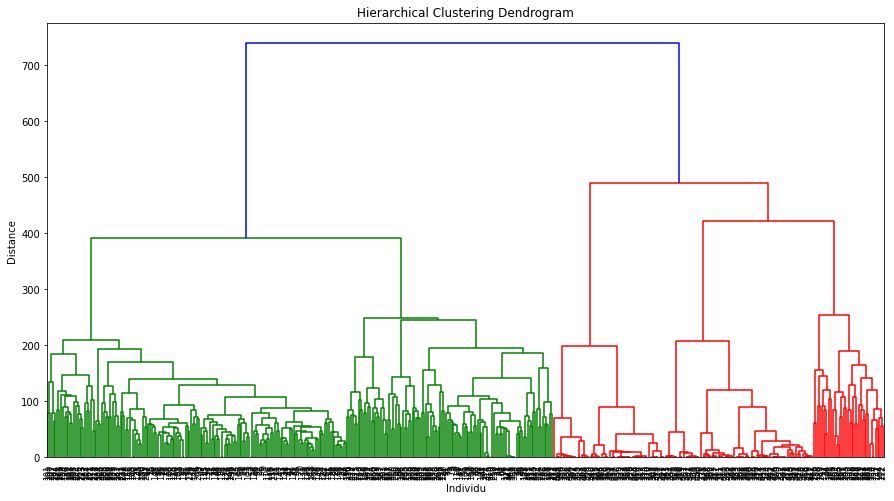

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(Data_App, 'ward')
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Individu')
plt.ylabel('Distance')

x= dendrogram(Z,leaf_font_size=8.)
plt.show()

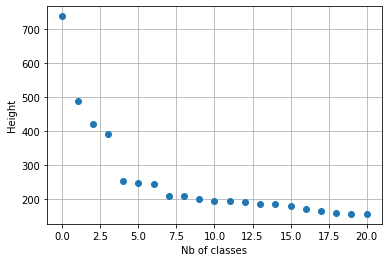

In [18]:
k = sorted(Z[:,2],reverse = True)
plt.xlabel("Nb of classes")
plt.ylabel("Height")
plt.plot(k[:21],"o")
plt.grid()
plt.show()

On remarque qu'avec une distance de 500 on peut distinguer 3 classes. 

Représentation spectrale des données avec la transformation de Fourier

# Partie I : Sélection de modèles et pénalisation

### 1. Régression Multiclasse

Appliquer un modèle de **régression multiclasses**.

On modélise les probabilités par la forme suivante :

$$
\mathbb{P}(Y_i = j) = \frac { \exp{-\beta_j^{T} X_i } } { 1 + \sum_{\ell = 1}^{K-1} \exp{-\beta_\ell^{T} X_i }}, 
$$
Pour tout $j$ dans $\{ 1,2, \dots , K-1 \}$.

On peut aussi considérer un modèle binomiale par classe pour l'analyse. i.e (Considérer les labels dans la classe $k$ comme étant 1 et les autres labels 0)

Pour votre étude, On vous proposera les comparaisons suivantes (liste exhaustive) : 

1. Essayer différents type d'optimiseurs disponibles dans la librairie Sklearn (lbfgs, saga, sag, newton-cg) et comparer la vitesse de convergence.

2. Faire varier le coefficient de régularisation $C$ (<span style="color:red"> **Il y a toujours une régularisation par défaut dans sklearn** </span>) et comparer son effet sur la performance.

3. Modèle binomiale versus Régression multinomiale. 

4. Le rescaling des donnés améliore t-il la performance ? 


### 2. Modèle de régression multiclasse

Dans un premier temps on implémente une régression logistique classique avec le solveur saga : 

In [19]:
# Modèle de régression 
from sklearn.linear_model import LogisticRegression
saga = LogisticRegression(multi_class='multinomial', max_iter = 10000, solver = 'saga', penalty = 'none').fit(Data_App, Label_App.ravel())

def prediction(methode, Data_Test): 
    return methode.predict(Data_Test)
pred_test = prediction(saga, Data_Test)

### 3. Evaluation des résultats 

Evaluer le résultat par matrice de confusion et pourcentage de bonne classification.

*Conseil :* Pensez à mettre une fonction pour afficher la matrice de confusion

score :  0.7083333333333334


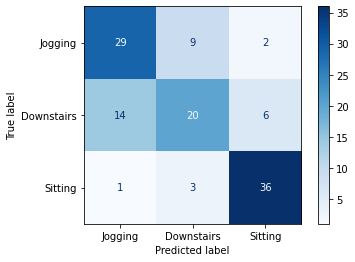

In [20]:
# Evaluation des résultats par matrices de confusion 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(saga, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ", accuracy_score(Label_Test, pred_test))


### 4. Variations du paramètres de Pénalisation 

On va alors ajouter une pénalisation avec d'affiner la régression : 

In [21]:
from sklearn.model_selection import GridSearchCV
params = {'C' : [0.1, 0.25, 0.5, 0.75, 1]}
estimator = LogisticRegression(multi_class='multinomial', max_iter = 10000, solver = 'saga', penalty = 'l2')
cv = GridSearchCV(estimator, cv=10, param_grid = params).fit(Data_App, Label_App.ravel())
bestC = cv.best_params_["C"]
print("meilleur C : ", bestC)

meilleur C :  0.1


Affichage des résultats

score :  0.7083333333333334


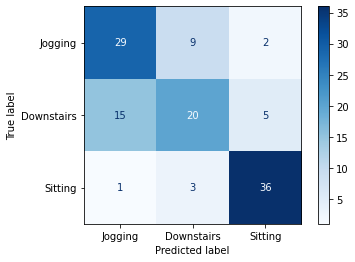

In [22]:
saga_newC = LogisticRegression(multi_class='multinomial', C=bestC, max_iter = 10000, solver = 'saga', penalty = 'l2').fit(Data_App, Label_App.ravel())
disp = plot_confusion_matrix(saga_newC, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ",accuracy_score(Label_Test, prediction(saga_newC, Data_Test)))

On constate déjà une amélioration du score avec une pénalisation de Ridge. 

### 5. Rescaling des données

score :  0.7333333333333333


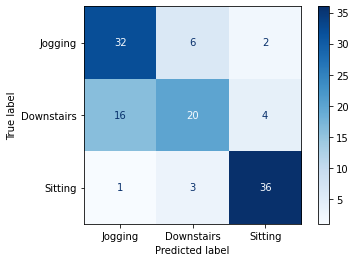

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_App_scaled = scaler.fit_transform(Data_App)
Data_Test_scaled = scaler.transform(Data_Test)
saga_scaled = LogisticRegression(multi_class='multinomial', C=bestC, max_iter = 10000, solver = 'saga', penalty = 'l2').fit(Data_App_scaled, Label_App.ravel())

disp = plot_confusion_matrix(saga_scaled, scaler.transform(Data_Test), Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ",accuracy_score(Label_Test, prediction(saga_scaled, Data_Test_scaled)))

On remarque ici que la normalisation des données permet de gagner en efficacité de l'algorithme. 

### Variations des optimiseurs utilisés

On va tester ici de faire varier les solveurs utilisés. 

In [24]:
sag = LogisticRegression(multi_class='multinomial', solver = 'sag', penalty = 'none').fit(Data_App, Label_App.ravel())
newton_cg = LogisticRegression(multi_class='multinomial', solver = 'newton-cg', penalty = 'none').fit(Data_App, Label_App.ravel())
lbfgs = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', penalty = 'none').fit(Data_App, Label_App.ravel())


/home/n7student/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/n7student/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Affichage des résultats

#### Pour sag : 

score :  0.6916666666666667


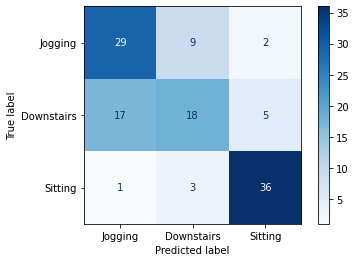

In [25]:
disp = plot_confusion_matrix(sag, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ", accuracy_score(Label_Test, prediction(sag, Data_Test)))

#### Pour Newton-cg

score :  0.6916666666666667


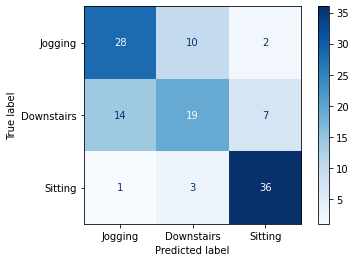

In [26]:
disp = plot_confusion_matrix(newton_cg, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ", accuracy_score(Label_Test, prediction(newton_cg, Data_Test)))

#### Pour lbfgs

score:  0.7


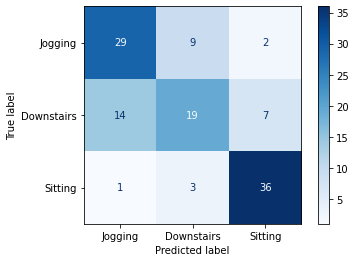

In [27]:
disp = plot_confusion_matrix(lbfgs, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score: ", accuracy_score(Label_Test, prediction(lbfgs, Data_Test)))

On remarque ici que le meilleur solveur est le solveur saga pour ce problème. 

### Ajout d'un terme de pénalisation Lasso

Dans un cadre générique, la pénalisation Lasso revient à régulariser une fonction perte par une norme $\ell_1$. 

Cette régularisation a tendance à offrir une solution parcimonieuse en éliminant un certain nombre de variables. 
Plusieurs applications sont disponibles: Réduction de dimension, Interprétabilité des modèles.



**Inconvénient:** plus difficile à optimiser (car non lisse). LBFGS et newton-CG ne sont pas disponibles. Sklearn propose SAGA et liblinear.

On vous propose les méthodes suivantes à essayer : 
 

1. Variation du paramètre de Régularisation 

2. Mélange entre Lasso et pénalité $\ell_2$

**l_1 ratio** : réel compris entre 0 et 1.  Le mélange entre la pénalité $\ell_1$ et la pénalité $\ell_2$. 

Si 1, alors c'est du Lasso Complet et si 0, il s'agit de la pénalisation $\ell_2$. 





In [28]:
from sklearn.model_selection import GridSearchCV
params = {'C' : [0.1, 0.25, 0.5, 0.75, 1]}
estimator = LogisticRegression(multi_class='multinomial', max_iter = 10000, solver = 'saga', penalty = 'l1')
cv = GridSearchCV(estimator, cv=10, param_grid = params).fit(Data_App, Label_App.ravel())
bestC = cv.best_params_["C"]

### Affichage des résultats

score :  0.75


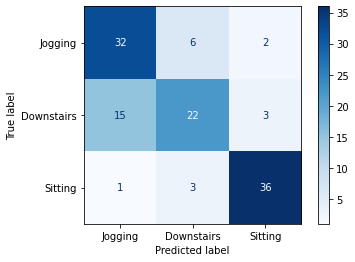

In [29]:
saga_newC = LogisticRegression(multi_class='multinomial', C=bestC, max_iter = 10000, solver = 'saga', penalty = 'l1').fit(Data_App, Label_App.ravel())
disp = plot_confusion_matrix(saga_newC, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ", accuracy_score(Label_Test, prediction(saga_newC, Data_Test)))

### Elastic Net : 

In [30]:
from sklearn.model_selection import GridSearchCV
params = {'l1_ratio' : [0.1, 0.25, 0.5, 0.75, 1]}
estimator = LogisticRegression(multi_class='multinomial', C=bestC, max_iter = 10000, solver = 'saga', penalty = 'elasticnet')
cv = GridSearchCV(estimator, cv=10, param_grid = params).fit(Data_App, Label_App.ravel())
bestl1ratio = cv.best_params_["l1_ratio"]

### Affichage des résultats

score:  0.75


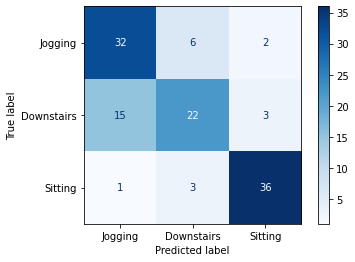

In [31]:
saga_bestl1rat = LogisticRegression(multi_class='multinomial', C=bestC, max_iter = 10000, solver = 'saga', penalty = 'elasticnet', l1_ratio = bestl1ratio).fit(Data_App, Label_App.ravel())
disp = plot_confusion_matrix(saga_bestl1rat, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score: ",accuracy_score(Label_Test, prediction(saga_bestl1rat, Data_Test)))




# Partie II : Classification par méthodes à noyau

**Rappel** Les méthodes à noyau consistent à plonger les données dans un espace de dimension de Hilbert $\mathcal{H}$ ou on espère que les donnés pourront être séparées linéairement. 

**Theorème de Représentation :** La solution du problème de séparation en dimension infinie est contenue dans un sous espace vectoriel de dimension finie de $\mathcal{H}$ 

### 1. Réaliser une classification par SVM à noyau

    1) Varier le noyau
    2) Varier le paramètre de régularisation.






On va réaliser ici une SVM à noyau sur les données originales et normalisées. 

In [32]:
from sklearn.svm import SVC
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_App_scaled = scaler.fit_transform(Data_App)
Data_Test_scaled = scaler.transform(Data_Test)
X_scaled = Data_App_scaled
X = Data_App
y = np.ravel(Label_App)
from sklearn.svm import SVC

svm = SVC(kernel='rbf').fit(X,y)
svm_scaled = SVC(kernel='rbf').fit(X_scaled,y)
#linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

### Evaluer les résultats par matrice de confusion 

score :  0.95
score données scale :  0.95


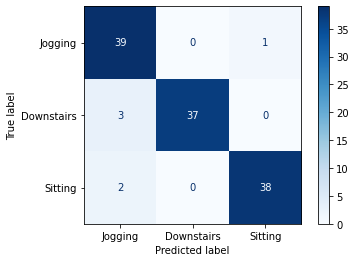

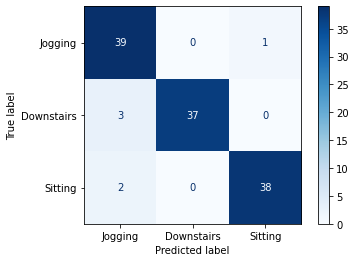

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
y_pred = svm.predict(Data_Test)
y_pred_scaled  = svm_scaled.predict(Data_Test_scaled)

sc = accuracy_score(Label_Test, y_pred)
plot_confusion_matrix(svm, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ",sc)
sc_scaled = accuracy_score(Label_Test, y_pred_scaled)
plot_confusion_matrix(svm_scaled, Data_Test_scaled, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score données scale : ", sc_scaled)

On va optimiser les paramètres du SVM : 

In [34]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.0001,0.01,0.1,1,3,5,8,10], 
              'gamma': ['scale',1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}
grid = GridSearchCV(SVC(), param_grid)#, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X, y)
print("param    ",grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("\n\n estim",    grid.best_estimator_)

param     {'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}


 estim SVC(C=8)


score de svm optimisé :  0.9583333333333334


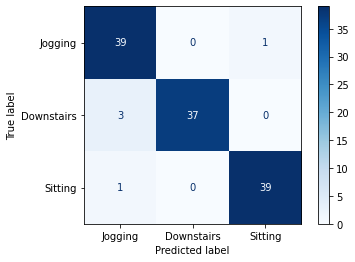

In [35]:
pred = grid.predict(Data_Test)
svc1 = accuracy_score(Label_Test, pred)
plot_confusion_matrix(grid, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score de svm optimisé : ", svc1)
#si trop de paramètre on surapprend


On arrive en faisant une gridSearchCV à obtenir un score de ~95% grâce au SVM, ce qui est puissant étant donné le peu de données qu'on donne pour l'instant. 

### 2.  Classification spectrale 

 On peut aussi transposer à l'espace de Hilbert $\mathcal{H}$ des algos classiques de $\mathbb{R}^d$ comme la Classification spectrale.
 
 Réaliser une classification spectrale non supervisée sur les données. Interpréter les résultats 

In [ ]:
from sklearn.cluster import SpectralClustering
DataFull = np.vstack((Data_App,Data_Test))
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize').fit(DataFull)
LabelFull = np.vstack((Label_App,Label_Test))
clustering1 = accuracy_score(LabelFull,clustering.labels_)
print(confusion_matrix(LabelFull,clustering.labels_),clustering1)

In [100]:
clustering1 = "trop long"

On réalise ici une classification spectrale qui nous donne 

# Partie III : Boosting 

## 1. Adaptive Boosting : AdaBoost 

Adaboost repose sur la sélection itérative de classifieur faible en fonction d'une distribution des exemples d'apprentissage. Chaque exemple est pondéré en fonction de sa difficulté avec le classifieur courant. 

Réaliser une classification par adaboost et étudier 

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),algorithm="SAMME.R",n_estimators=100)
clf.fit(Data_App,Label_App)
y_pred = clf.predict(Data_Test)
print(clf.score(Data_Test,Label_Test))

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9166666666666666


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'base_estimator':[DecisionTreeClassifier(max_depth=3),RandomForestClassifier(max_depth=3)],"algorithm":["SAMME"],'learning_rate':[1,0.7,0.5,0.2]}
clf2 = AdaBoostClassifier()
grid = GridSearchCV(clf2,parameters)
grid.fit(Data_App,Label_App.ravel())
adaboost1 = grid.best_score_
grid.best_params_,grid.best_estimator_,adaboost1

({'algorithm': 'SAMME',
  'base_estimator': RandomForestClassifier(max_depth=3),
  'learning_rate': 0.7},
 AdaBoostClassifier(algorithm='SAMME',
                    base_estimator=RandomForestClassifier(max_depth=3),
                    learning_rate=0.7),
 0.9400000000000001)

la technique de boosting AdaBoost nous donne, avec une optimisation des paramètres, un score de 

## 2. Gradient Boosting

Le Gradient Boosting permet l'optimisation de fonctions de perte différentiables arbitraires. Il permet d'optimiser la fonction de perte de l'apprenant précédent en ajoutant un nouveau modèle adaptatif qui combine des apprenants faibles.

Etudier sur la fonction de perte et le taux d'apprentissage.

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=1)
gbc.fit(Data_App,Label_App)
gbc.score(Data_Test,Label_Test)

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9

**Evaluation de la classification**

Utiliser la validation croisée pour évaluer les résultats 

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=1),DataFull,LabelFull.ravel(),cv=5)

array([0.9122807 , 0.94736842, 0.93859649, 0.9122807 , 0.90350877])

In [43]:
parameters = {'n_estimators':np.arange(100,400,100),'max_depth':[3,4],'learning_rate':[1,0.7,0.5,0.2]}
clf3 = GradientBoostingClassifier()
grid2 = GridSearchCV(clf3,parameters,cv=5)
grid2.fit(Data_App,Label_App.ravel())
grid2.best_params_,grid2.best_estimator_,grid2.best_score_

({'learning_rate': 0.7, 'max_depth': 4, 'n_estimators': 200},
 GradientBoostingClassifier(learning_rate=0.7, max_depth=4, n_estimators=200),
 0.9400000000000001)

In [44]:
gradient1 = grid2.score(Data_Test,Label_Test)

Cette méthode de boosting nous donne un résultat bon qu'Adaboost.

### Bonus : Extreme gradient boosting 

Installer le package xgboost et voir si il apporte de meilleurs performances. 

Lien : https://xgboost.readthedocs.io/en/latest/.

In [45]:
import xgboost as xgb
param={'max_depth':3,'eta':1,"objective":"multi:softmax","num_class":3,'eval_metric':'merror'}
num_round = 1000
D_train = xgb.DMatrix(Data_App,label=Label_App)
bst = xgb.train(param,D_train, num_round)
D_test = xgb.DMatrix(Data_Test,label=Label_Test)
xgboost1 = 1-float(bst.eval(D_test)[17:])
"score ", xgboost1

('score ', 0.891667)

On obtient ici un score moins élevé que pour le techniques de boosting précédemment testées et optimisées.  

# Partie IV : apprentissage par ensemble : Classification par Forêts aléatoires 


**Principe méthodes ensemblistes** : 

1. Combiner des prédicteurs faibles (arbres de choix ) pour avoir une estimation robuste. Le principe de base est le bagging (Bootstrap Aggregation). On entraine les arbres de décisions sur des sous ensembles de données tirés au hasard avec remise. **&#8594;** <span style="color:red"> **Réduire la variance des estimateurs** </span>. 

2. Comment combiner les différents arbres ? : 

    i. De manière indépendante et parallèle (Random Forest). 
    
    ii. De manière séquentielle en pondérant les mauvaises prédictions précédentes dans la fonction de perte  (adaboost, xgboost). 
    
3. Advantages et inconvénients : 

    i. Méthodes offrant de bonnes performances sans beacoup d'efforts (choix hyperparamètres, features engenieering) .
    
    ii. le boosting (particullièrement xgboost) est une excellente baseline (Premier sur les challenges Kaggle hors vision). 
    
    iii. Entrainement coûteux et long. Modèles de types boîtes noires.
    
**Remarque : ces méthodes sont sensibles à l'overfit.**   

<img title="Title Tag Goes Here" src="figures/adaboost.png" alt="Your Alt Tag is Here"  width="800" height="600"  >

***
<center> Figure: Principe du boosting   </center>

### Forêts aléatoires

In [46]:
from sklearn.ensemble import RandomForestClassifier 
rfc=RandomForestClassifier(max_depth=3,n_estimators=100,criterion="gini",oob_score=True)
rfc.fit(Data_App,Label_App)

/home/n7student/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=3, oob_score=True)

#### Evaluation

**Evaluation de la classification**

La performance des forêts aléatoires peut être estimée par : 
- **Accuracy score :** évaluation de la précision c'est-à-dire du nombre de données bien classées.
- **Out-of-bag estimate :**  méthode de mesure de l'erreur de prédiction des forêts aléatoires, des arbres de décision renforcés et d'autres modèles d'apprentissage utilisant l'agrégation bootstrap pour sous-échantillonner les données d'apprentissage. L'OOB est l'erreur moyenne de prédiction sur chaque échantillon d'apprentissage xᵢ, en utilisant uniquement les arbres qui n'avaient pas xᵢ dans leur échantillon bootstrap.
 <span style="color:red"> **cette quanitié est utilisée comme proxy  de l'erreur de généralisation de l'échantillion test mais peut induire en erreur**.</span>


- Ces méthodes proposent aussi des scores d'importances pour les variables basée sur le critère de pureté utilisé lors du splitting.



In [47]:
rfc.score(Data_Test,Label_Test),rfc.oob_score_

(0.875, 0.8711111111111111)

Varier les hyperparamètres pour vérifier la sensibilité de la méthode. (nombre d'arbres, profondeur maximal, nombre d'individus par feuille). 

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':np.arange(100,400,100),'max_depth':[3,4,5,10,25,50]}
rfc2 = RandomForestClassifier(oob_score=True)
grid3 = GridSearchCV(rfc2,parameters,cv=5)
grid3.fit(Data_App,Label_App.ravel())
rf1 = grid3.score(Data_Test,Label_Test)
grid3.best_params_,grid3.best_estimator_,grid3.best_score_,rf1

({'max_depth': 10, 'n_estimators': 200},
 RandomForestClassifier(max_depth=10, n_estimators=200, oob_score=True),
 0.9444444444444444,
 0.925)

# Partie V : Classification par réseaux de neurones

1. Réaliser une classification via les réseaux de neurones
2. Evaluer les résultats par matrice de confusion par exemple, fonction de perte...
3. Tester différentes architectures et différents solveurs

On va tester ici deux fonctions qui permettent de réaliser des MLP : celle de sklearn, dans laquelle on n'a pas vraiment la main sur les hyperparamètres et celle de Keras dans laquelle on construit couche par couche le réseau. On pourra comparer les deux méthodes. 

In [49]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=300).fit(Data_App, Label_App)

pred= clf.predict(Data_Test)
mlp_sk1 = clf.score(Data_Test, Label_Test)
mlp_sk1,pred


/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.875,
 array([0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
        2.]))

In [50]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4

Found existing installation: Keras 2.4.0
Uninstalling Keras-2.4.0:
  Successfully uninstalled Keras-2.4.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: tensorflow 2.3.0
Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.3.0-cp37-cp37m-manylinux2010_x86_64.whl (320.4 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
  Using cached Keras-2.4.0-py2.py3-none-any.whl (170 kB)


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models, optimizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

import pandas as pd 
y_train = to_categorical(Label_App.ravel())
y_test = to_categorical(Label_Test.ravel())


model = Sequential()
model.add(Dense(16, activation='relu', input_dim=90))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
optim = optimizers.SGD(lr = 0.01)
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1456      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 2,579
Trainable params: 2,579
Non-trainable params: 0
_________________________________________________________________
None


Using TensorFlow backend.


In [52]:
history = model.fit(Data_App, Label_App.ravel(), epochs=20, batch_size=10, validation_split=0.25)

Epoch 1/20
34/34 [==============================] - 0s 3ms/step - loss: 0.9160 - accuracy: 0.6914 - val_loss: 0.8377 - val_accuracy: 0.8938
Epoch 2/20
34/34 [==============================] - 0s 921us/step - loss: 0.5043 - accuracy: 0.8071 - val_loss: 0.7386 - val_accuracy: 0.8850
Epoch 3/20
34/34 [==============================] - 0s 931us/step - loss: 0.4057 - accuracy: 0.8635 - val_loss: 0.4152 - val_accuracy: 0.9027
Epoch 4/20
34/34 [==============================] - 0s 906us/step - loss: 0.3617 - accuracy: 0.8724 - val_loss: 0.4180 - val_accuracy: 0.9027
Epoch 5/20
34/34 [==============================] - 0s 887us/step - loss: 0.2746 - accuracy: 0.9199 - val_loss: 0.3247 - val_accuracy: 0.9115
Epoch 6/20
34/34 [==============================] - 0s 906us/step - loss: 0.2606 - accuracy: 0.9110 - val_loss: 0.3127 - val_accuracy: 0.9115
Epoch 7/20
34/34 [==============================] - 0s 895us/step - loss: 0.2072 - accuracy: 0.9436 - val_loss: 0.4542 - val_accuracy: 0.9115
Epoch 8/

In [20]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

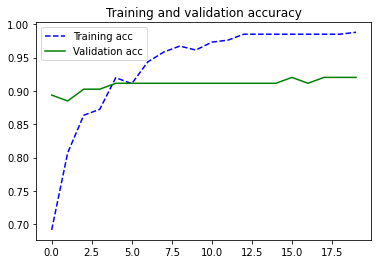

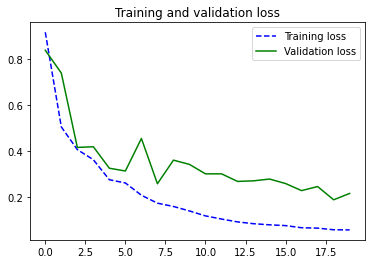

In [54]:
plot_training_analysis()

In [55]:
ypred = model.predict(Data_Test)
mlp_keras1 = model.evaluate(Data_Test, Label_Test)[1]

4/4 [==============================] - 0s 814us/step - loss: 0.3808 - accuracy: 0.8667


On se rend compte que les deux MLP se valent en moyenne. On les gardera les deux pour la suite de l'étude. 

# Partie VI : votre étude

Réalisez votre propre étude en :
- en augmentant les bases de test et/ou d'apprentissage et/ou la durée des segments 
- en proposant des variantes des méthodes proposées ou en utilisant d'autres
- en rajoutant davantage de classes (jusqu'à 3 supplémentaires : 4-Debout, 5-Monter ou 6-Marcher ) 
- en comparant analyses temporelle et fréquentielle
le tout en testant les différentes approches et en interprétant les résultats, à synthétiser sur un rapport. 

Nous avons décidé d'utiliser seulement les méthodes ayant un scorede 75% ou plus sur le jeu 150/40




### Agrégation de différents classifieurs 





Idée : Agréger différents classifieurs afin d'avoir un prédicteur final plus robuste.

Chaque Classifieur apporte une information sur la classification et le vote d'un ensemble est généralement plus robuste .

Exemple : https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
1





In [56]:
from sklearn.ensemble import VotingClassifier
vot_class = VotingClassifier([('lasso',saga_newC),('rf',rfc)])
vot_class.fit(Data_App,Label_App.ravel())

VotingClassifier(estimators=[('lasso',
                              LogisticRegression(C=0.1, max_iter=10000,
                                                 multi_class='multinomial',
                                                 penalty='l1', solver='saga')),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     oob_score=True))])

In [57]:
vot_class.score(Data_Test,Label_Test)

0.7666666666666667

Exemple : **Construire un prédicteur combianant kmeans/regression/kernel**

In [58]:
vot_class2 = VotingClassifier([('regression',saga_scaled),('svm', svm)])
vot_class2.fit(Data_App,Label_App.ravel())

VotingClassifier(estimators=[('regression',
                              LogisticRegression(C=0.1, max_iter=10000,
                                                 multi_class='multinomial',
                                                 solver='saga')),
                             ('svm', SVC())])

In [59]:
vot_class2.score(Data_Test,Label_Test)

0.8083333333333333

La svm ayant déjà fait ses preuves, elle se montre efficace aggrégée à d'autres classifieurs comme nous pouvons le voir. 

#### Dans la suite de l'étude nous allons tester les modèles précédemment implémentés en faisant varier le nombre de données, le nombre de classes, le temps des enregistrements. Puis nous finirons par faire une analyse fréquentielle du problème. Vous pourrez alors trouver en fin de notebook un tableau récapitulatif des performances des différents cas qu'on aura implémenté. 

## Cas d'usage n°1 : augmentation du nombre de données

Classe N° 0
Classe N° 1
Classe N° 2
(3000, 90)
(750, 90)


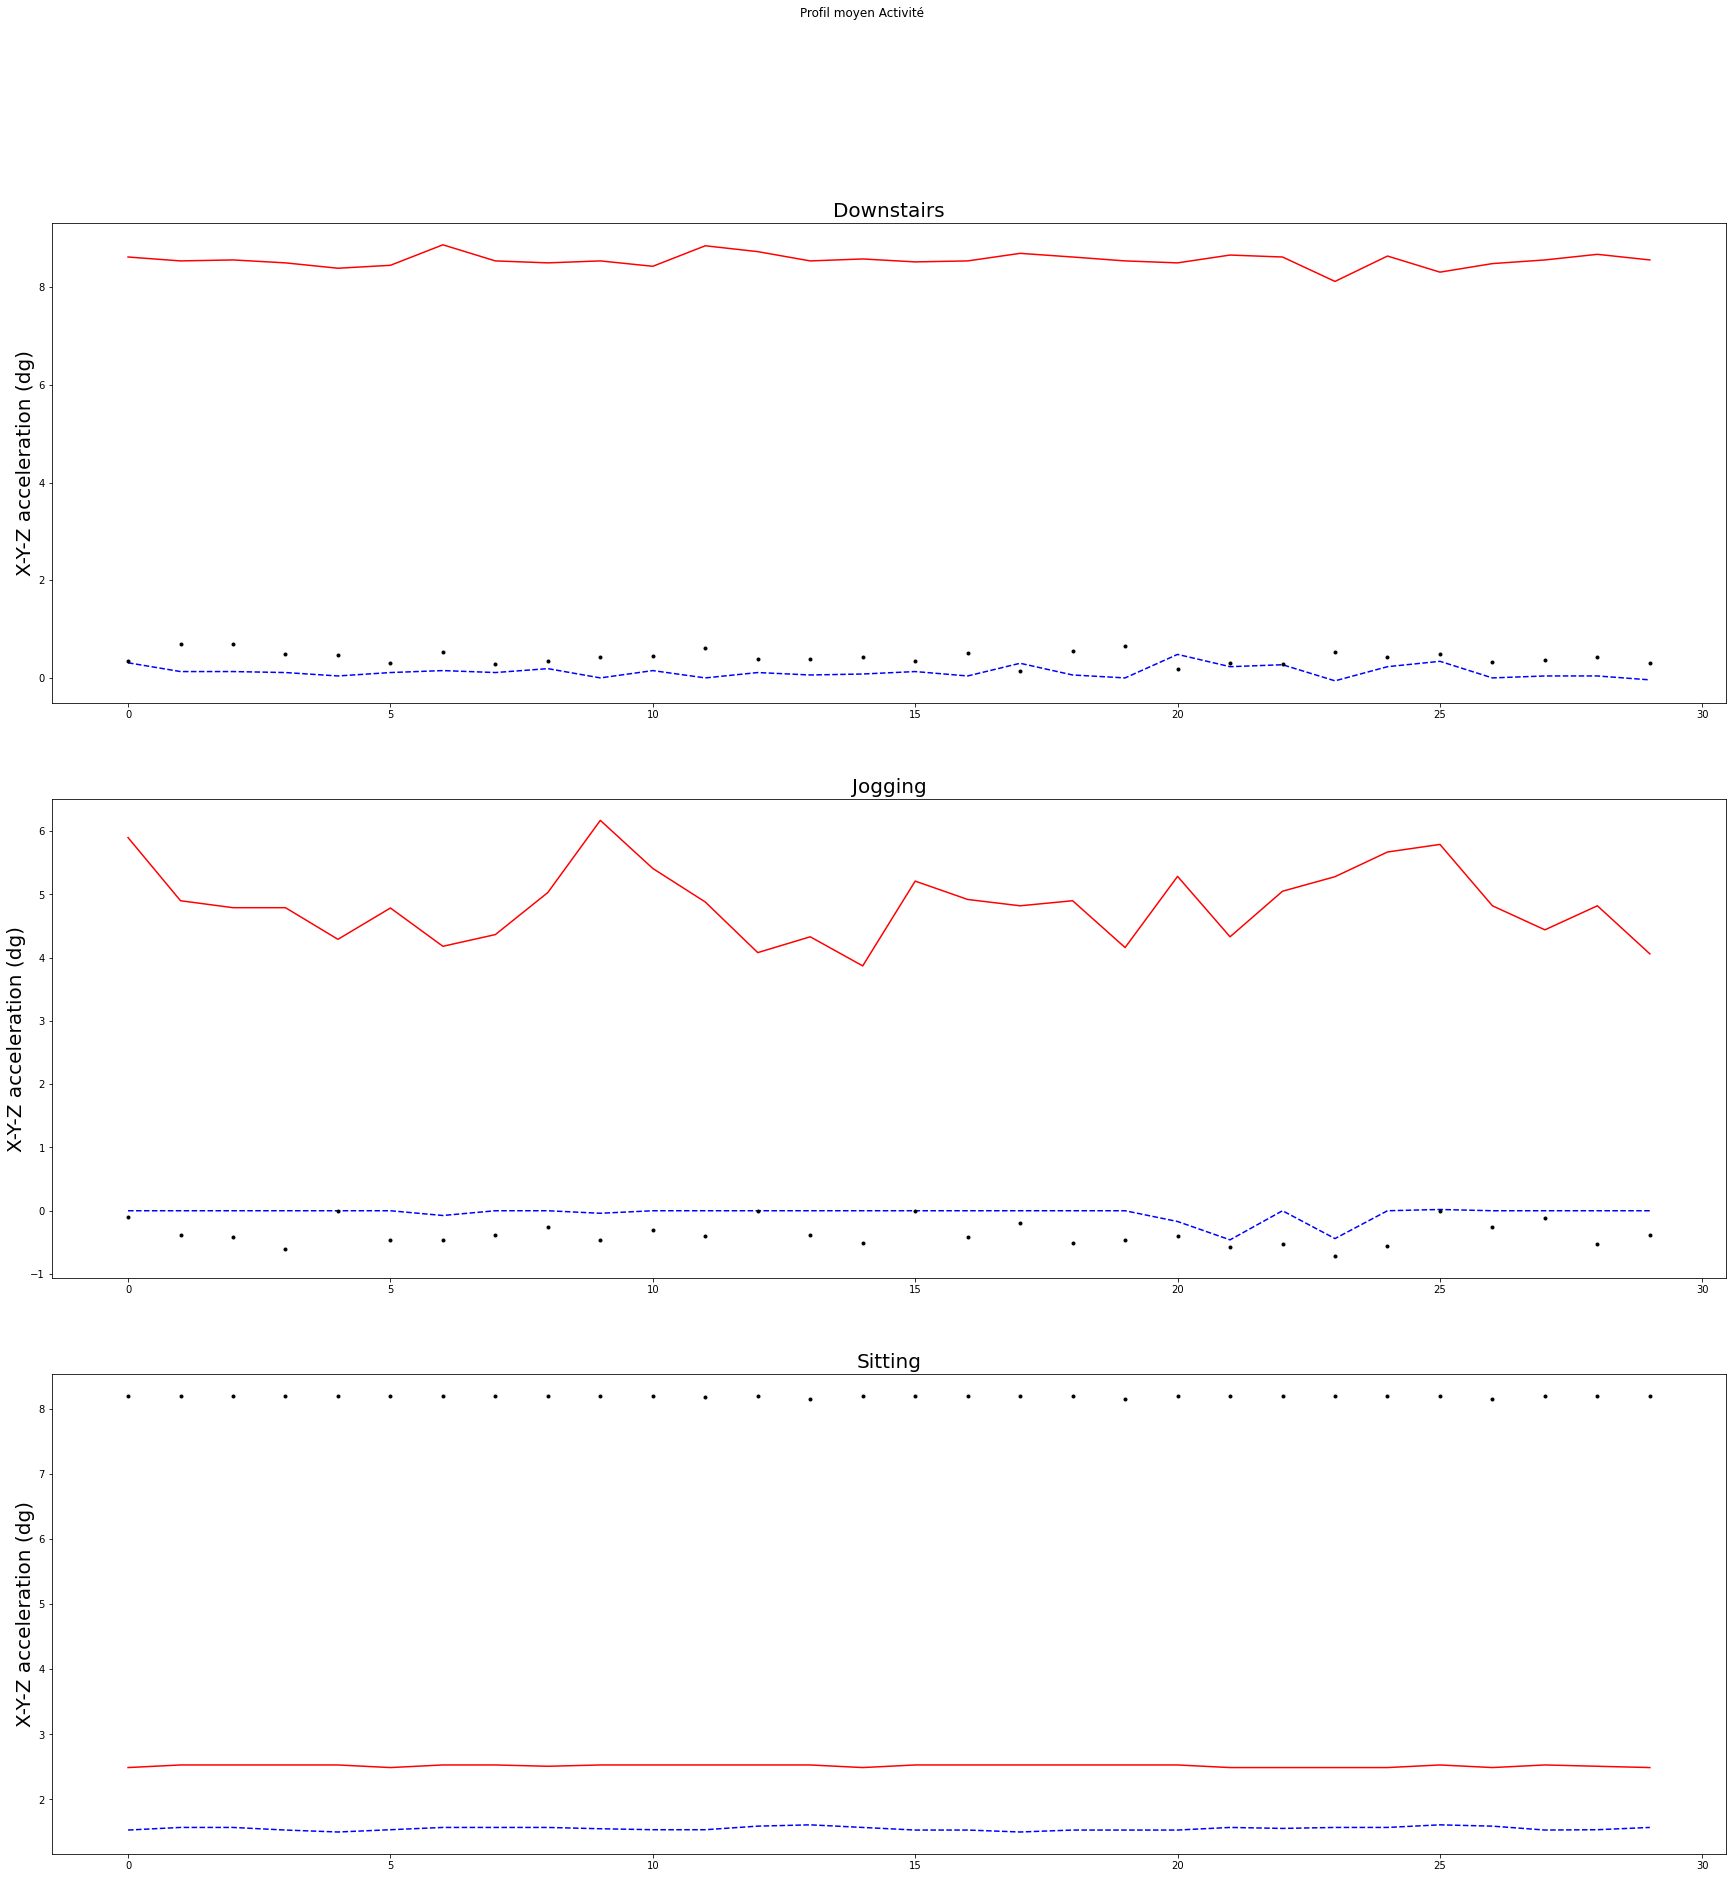

In [7]:
# Data preprocessing
TIME_STEP = 60

# Model
N_CLASSES = 3
N_FEATURES = 3  # x-acceleration, y-acceleration, z-acceleration
SEGMENT_TIME_SIZE = 30
TAILLE_TEST=250
TAILLE_APP=1000
# Chargement des données 
data = pd.read_csv(DATA_PATH, header=None, names=COLUMN_NAMES)
data['z-axis'].replace({';': ''}, regex=True, inplace=True)
data = data.dropna()


data_convoluted = []
labels = []



# Prendre des segments temporels de taille SEGMENT_TIME_SIZE 
# tous les TIME_STEP pour une même activité
for j in range(0,N_CLASSES):
    DataBest=data[data['activity'] == LABELS[j]]
    for i in range(0, len(DataBest) - SEGMENT_TIME_SIZE, TIME_STEP):
        x = DataBest['x-axis'].values[i: i + SEGMENT_TIME_SIZE]
        y = DataBest['y-axis'].values[i: i + SEGMENT_TIME_SIZE]
        z = DataBest['z-axis'].values[i: i + SEGMENT_TIME_SIZE]
        data_convoluted.append([x, y, z])
    # Label de l'activité associée à chaque segment
        label = j
        labels.append(label)


# Conversion numpy
data_convoluted = np.asarray(data_convoluted, dtype=np.float32).transpose(0, 2, 1)

labels = np.asarray(labels, dtype=np.int)
#print("Convoluted data shape: ", data_convoluted.shape)
#print("Labels shape:", labels.shape)


fig, axs = plt.subplots(N_CLASSES,figsize=(30,30))
fig.suptitle('Profil moyen Activité')

profil_median=np.zeros((N_CLASSES,SEGMENT_TIME_SIZE,N_FEATURES))
List_Data_Test=np.zeros(N_CLASSES*TAILLE_TEST)
Data_Test=np.zeros((N_CLASSES*TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))
Data_App=np.zeros((TAILLE_APP*N_CLASSES,SEGMENT_TIME_SIZE*N_FEATURES))
Label_Test=np.zeros((N_CLASSES*TAILLE_TEST,1))
Label_App=np.zeros((N_CLASSES*TAILLE_APP,1))

for i in range(N_CLASSES):
    # Selection des données correspondant à la classe i
    print('Classe N°',i)
    res=np.where(labels==i)
    res=np.array(res)
    res=np.ravel(res)
    taille=res.shape[0]
    
    # Création de la base d'Apprentissage
    tirage=np.random.randint(0,taille,TAILLE_TEST+TAILLE_APP)
    tir_dataApp=data_convoluted[res[tirage[0:TAILLE_APP]],:,:]
    Data_App[i*TAILLE_APP:(i+1)*TAILLE_APP,:]=np.reshape(tir_dataApp,(TAILLE_APP,SEGMENT_TIME_SIZE*N_FEATURES))
    Label_App[i*TAILLE_APP:(i+1)*TAILLE_APP]=i
    
    
    # Création de la base de Test
    List_Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=res[tirage[TAILLE_APP:]]
    Label_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=i
    tir_dataTest=data_convoluted[res[tirage[TAILLE_APP:]],:,:]
    Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST,:]=np.reshape(tir_dataTest,(TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))

    # Affichage du profil temporel moyen de la classe
    class1=np.median(tir_dataApp,axis=0)
    profil_median[i,:,:]=class1
    
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,0],'b--')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,1],'r-')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,2],'k.')
    axs[i].set_ylabel('X-Y-Z acceleration (dg)',fontsize=20)
    axs[i].set_title(LABELS[i], fontsize=20)

print(Data_App.shape)

print(Data_Test.shape)

### SVM : 

In [61]:
from sklearn.svm import SVC
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_App_scaled = scaler.fit_transform(Data_App)
Data_Test_scaled = scaler.transform(Data_Test)
X_scaled = Data_App_scaled
X = Data_App
y = np.ravel(Label_App)
from sklearn.svm import SVC

svm = SVC(kernel='rbf').fit(X,y)
svm_scaled = SVC(kernel='rbf').fit(X_scaled,y)
#linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

score :  0.9653333333333334
score données scale :  0.9666666666666667


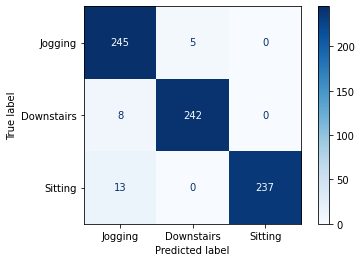

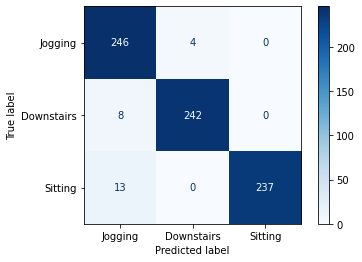

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
y_pred = svm.predict(Data_Test)
y_pred_scaled  = svm_scaled.predict(Data_Test_scaled)

sc = accuracy_score(Label_Test, y_pred)
plot_confusion_matrix(svm, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ",sc)
sc_scaled = accuracy_score(Label_Test, y_pred_scaled)
plot_confusion_matrix(svm_scaled, Data_Test_scaled, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score données scale : ", sc_scaled)

In [63]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [8], 
              'gamma': ['scale'],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid)#, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X, y)
print("param    ",grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("\n\n estim",    grid.best_estimator_)

param     {'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}


 estim SVC(C=8)


0.984


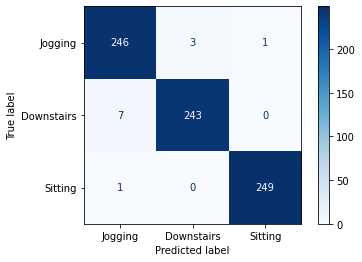

In [64]:
pred = grid.predict(Data_Test)
svm2 = accuracy_score(Label_Test, pred)
plot_confusion_matrix(grid, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print(svm2)
#si trop de paramètre on surapprend

###  Classification spectrale 

In [10]:
DataFull = np.vstack((Data_App,Data_Test))
LabelFull = np.vstack((Label_App,Label_Test))

In [ ]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize').fit(DataFull)
print(clustering.labels_,clustering)
clustering2 = accuracy_score(LabelFull,clustering.labels_)
print(confusion_matrix(LabelFull,clustering.labels_),)

In [102]:
clustering2 = "trop long"

### AdaBoost


In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),algorithm="SAMME",n_estimators=200,learning_rate=0.5)
clf.fit(Data_App,Label_App)
y_pred = clf.predict(Data_Test)
print(clf.score(Data_Test,Label_Test))

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.968


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = AdaBoostClassifier(RandomForestClassifier(max_depth=4),algorithm="SAMME",n_estimators=200,learning_rate=0.5)
clf.fit(Data_App,Label_App)
y_pred = clf.predict(Data_Test)
adaboost2 = accuracy_score(Label_Test.ravel(),y_pred)
print(adaboost2)

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.984


###  Gradient Boosting


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=300,max_depth=4,learning_rate=0.5)
gbc.fit(Data_App,Label_App)
gradient2 = gbc.score(Data_Test,Label_Test.ravel())

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingClassifier(n_estimators=300,max_depth=4,learning_rate=0.5),DataFull,LabelFull.ravel(),cv=5)

array([0.976     , 0.98133333, 0.97733333, 0.984     , 0.97733333])

### Extreme gradient boosting 

In [12]:
import xgboost as xgb
param={'max_depth':3,'eta':1,"objective":"multi:softmax","num_class":3,'eval_metric':'merror'}
num_round = 1000
D_train = xgb.DMatrix(Data_App,label=Label_App)
bst = xgb.train(param,D_train, num_round)
D_test = xgb.DMatrix(Data_Test,label=Label_Test)
xgboost2 = 1-float(bst.eval(D_test)[17:])
"score ", xgboost2

('score ', 0.969333)

### Forêts aléatoires

In [13]:
from sklearn.ensemble import RandomForestClassifier 
rfc=RandomForestClassifier(max_depth=3,n_estimators=100,criterion="gini",oob_score=True)
rfc.fit(Data_App,Label_App)

/home/n7student/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=3, oob_score=True)

In [14]:
rfc.score(Data_Test,Label_Test),rfc.oob_score_

(0.9, 0.8923333333333333)

In [15]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[200],'max_depth':[25]}
rfc2 = RandomForestClassifier(oob_score=True)
grid3 = GridSearchCV(rfc2,parameters,cv=5)
grid3.fit(Data_App,Label_App.ravel())
rf2 = grid3.score(Data_Test,Label_Test)
grid3.best_params_,grid3.best_estimator_,grid3.best_score_, rf2

({'max_depth': 25, 'n_estimators': 200},
 RandomForestClassifier(max_depth=25, n_estimators=200, oob_score=True),
 0.9690000000000001,
 0.968)

### Réseau de neurones 

In [16]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=300).fit(Data_App, Label_App)

pred= clf.predict(Data_Test)
mlp_sk2 = clf.score(Data_Test, Label_Test)
print("score : ", mlp_sk2)

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score :  0.9653333333333334


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models, optimizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential
from keras.utils import to_categorical

import pandas as pd 
y_train = to_categorical(Label_App.ravel())
y_test = to_categorical(Label_Test.ravel())

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=90))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

optim = optimizers.SGD(lr = 0.01)
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1456      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 2,579
Trainable params: 2,579
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [18]:
history = model.fit(Data_App, Label_App.ravel(), epochs=40, batch_size=10, validation_split=0.25)

Epoch 1/40
225/225 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.7778 - val_loss: 0.6605 - val_accuracy: 0.8560
Epoch 2/40
225/225 [==============================] - 0s 712us/step - loss: 0.3361 - accuracy: 0.8840 - val_loss: 0.7033 - val_accuracy: 0.8920
Epoch 3/40
225/225 [==============================] - 0s 768us/step - loss: 0.2491 - accuracy: 0.9147 - val_loss: 0.3615 - val_accuracy: 0.9240
Epoch 4/40
225/225 [==============================] - 0s 705us/step - loss: 0.2155 - accuracy: 0.9244 - val_loss: 0.2223 - val_accuracy: 0.9267
Epoch 5/40
225/225 [==============================] - 0s 676us/step - loss: 0.1763 - accuracy: 0.9431 - val_loss: 0.1673 - val_accuracy: 0.9613
Epoch 6/40
225/225 [==============================] - 0s 735us/step - loss: 0.1650 - accuracy: 0.9444 - val_loss: 0.2820 - val_accuracy: 0.9227
Epoch 7/40
225/225 [==============================] - 0s 683us/step - loss: 0.1399 - accuracy: 0.9529 - val_loss: 0.3513 - val_accuracy: 0

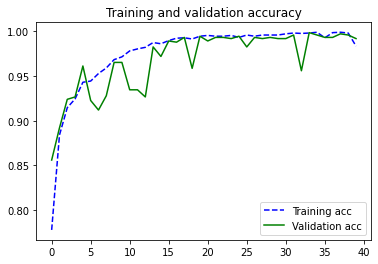

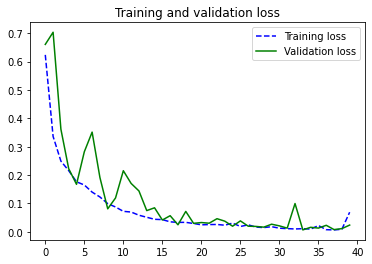

24/24 [==============================] - 0s 801us/step - loss: 0.2604 - accuracy: 0.9413


In [21]:
plot_training_analysis()
mlp_keras2 = model.evaluate(Data_Test, Label_Test)[1]

In [22]:
print("score : ", mlp_keras2)

score :  0.9413333535194397


## Cas d'usage n°2 : augmentation du nombre de classes

Classe N° 0
Classe N° 1
Classe N° 2
Classe N° 3
Classe N° 4
Classe N° 5
(6000, 90)
(1500, 90)


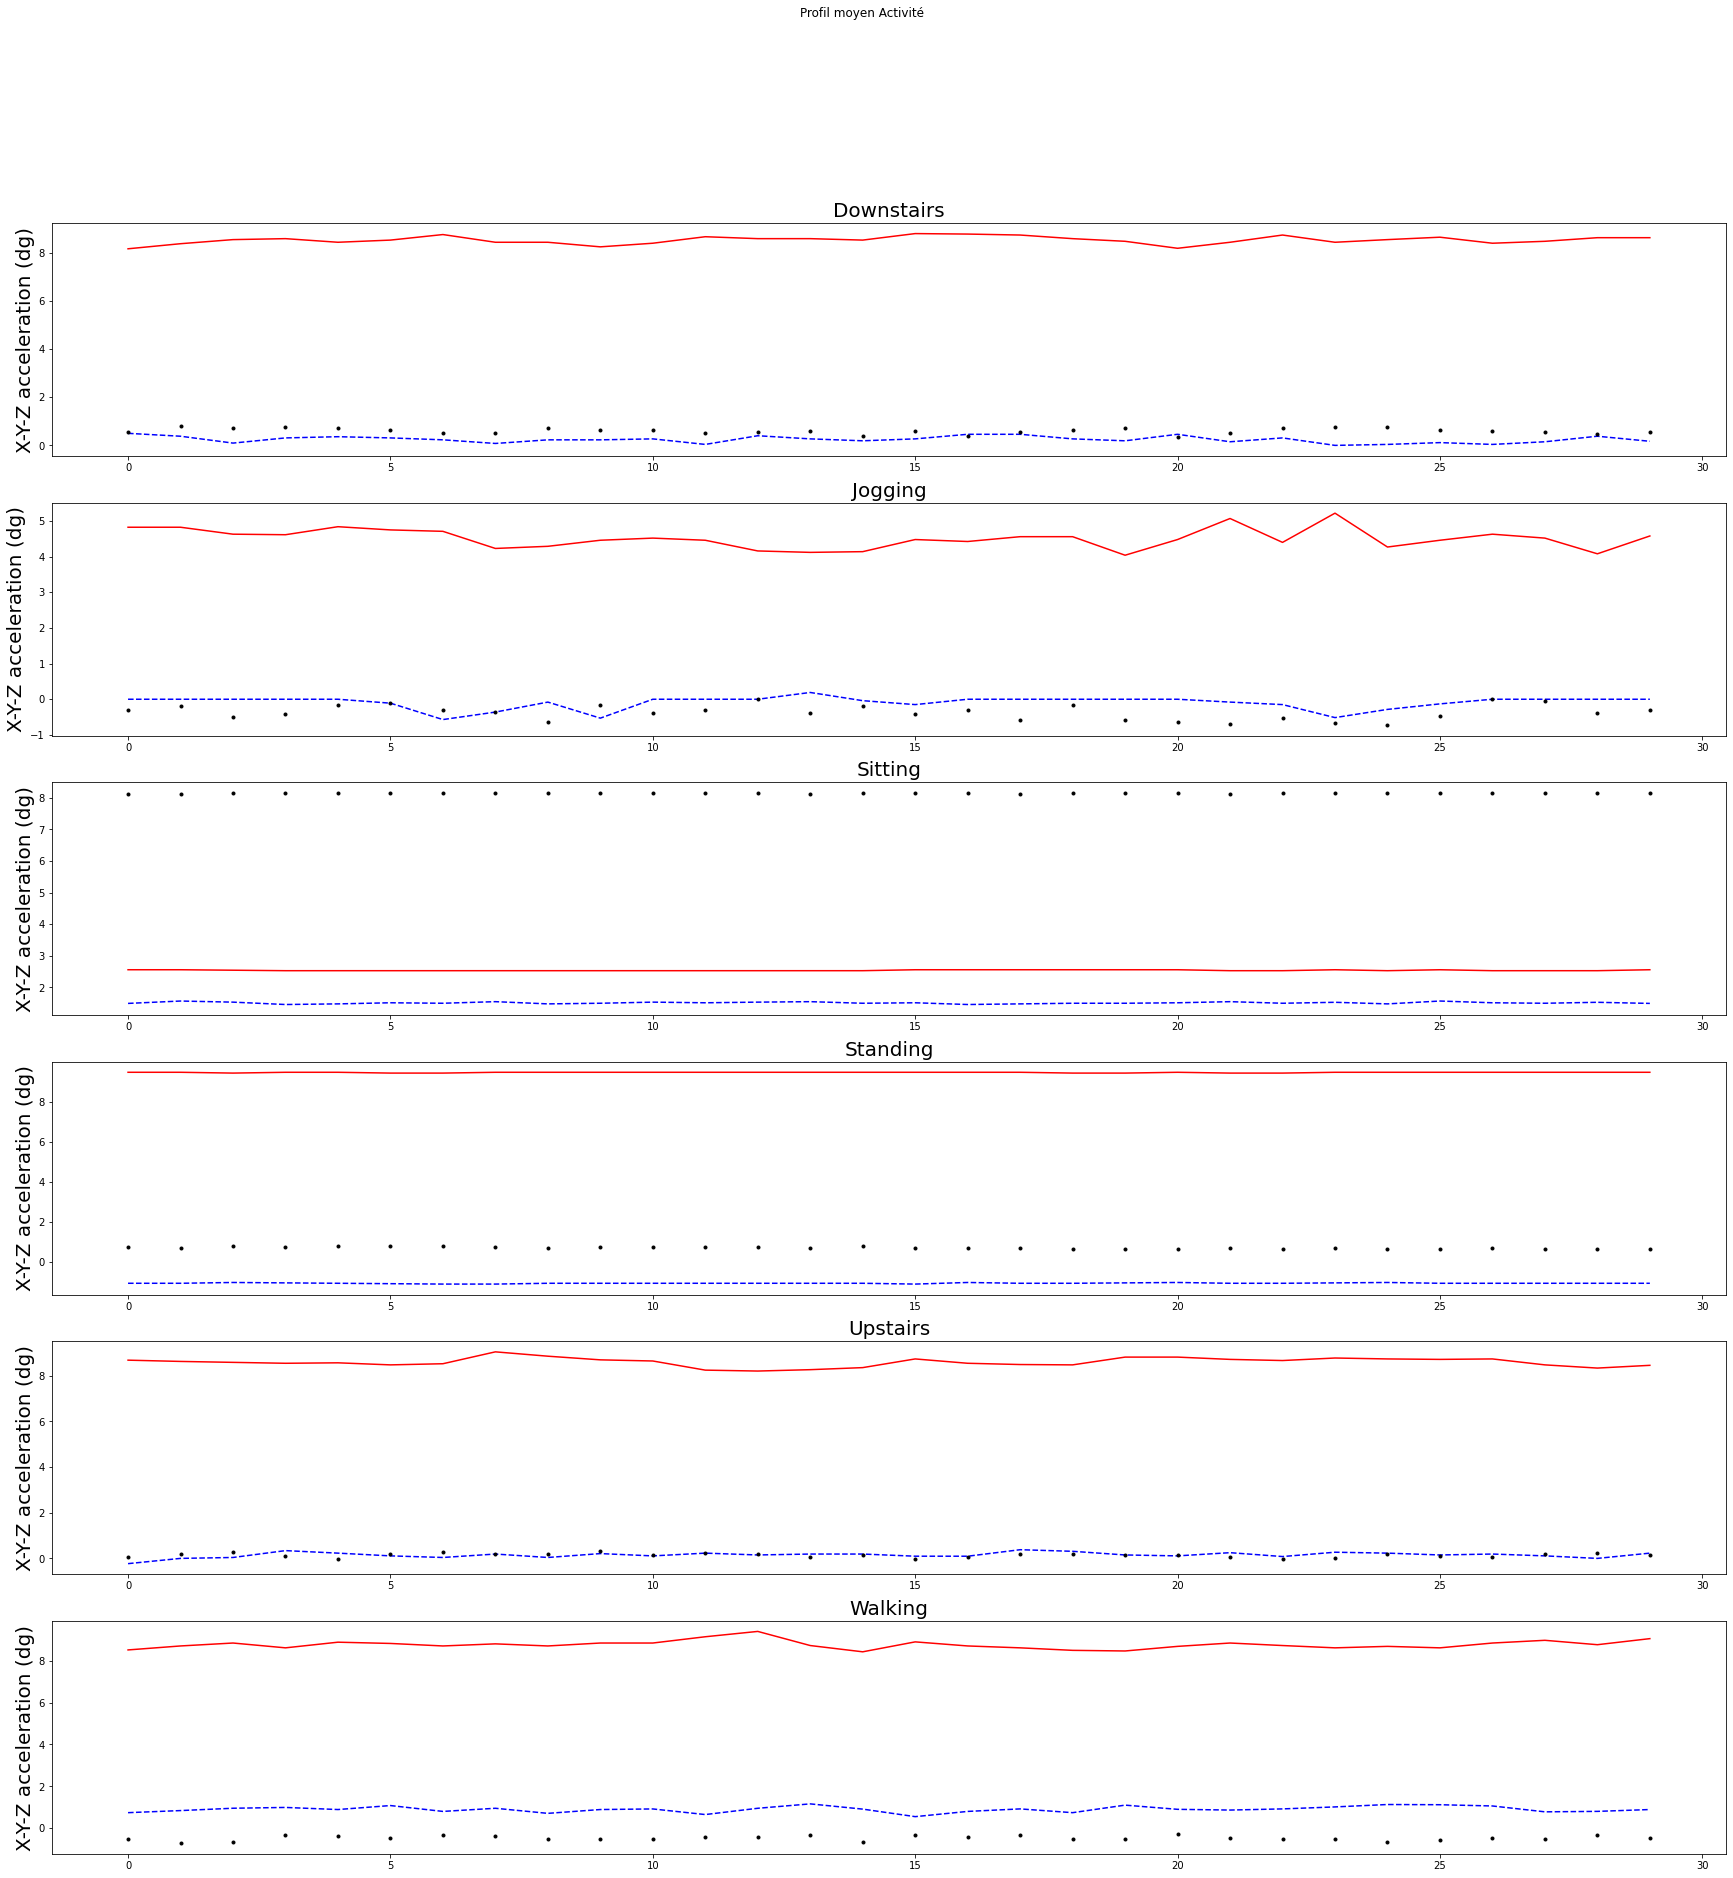

In [23]:
# Data preprocessing
TIME_STEP = 60

# Model
N_CLASSES = 6
N_FEATURES = 3  # x-acceleration, y-acceleration, z-acceleration
SEGMENT_TIME_SIZE = 30
TAILLE_TEST=250
TAILLE_APP=1000
# Chargement des données 
data = pd.read_csv(DATA_PATH, header=None, names=COLUMN_NAMES)
data['z-axis'].replace({';': ''}, regex=True, inplace=True)
data = data.dropna()


data_convoluted = []
labels = []



# Prendre des segments temporels de taille SEGMENT_TIME_SIZE 
# tous les TIME_STEP pour une même activité
for j in range(0,N_CLASSES):
    DataBest=data[data['activity'] == LABELS[j]]
    for i in range(0, len(DataBest) - SEGMENT_TIME_SIZE, TIME_STEP):
        x = DataBest['x-axis'].values[i: i + SEGMENT_TIME_SIZE]
        y = DataBest['y-axis'].values[i: i + SEGMENT_TIME_SIZE]
        z = DataBest['z-axis'].values[i: i + SEGMENT_TIME_SIZE]
        data_convoluted.append([x, y, z])
    # Label de l'activité associée à chaque segment
        label = j
        labels.append(label)


# Conversion numpy
data_convoluted = np.asarray(data_convoluted, dtype=np.float32).transpose(0, 2, 1)

labels = np.asarray(labels, dtype=np.int)
#print("Convoluted data shape: ", data_convoluted.shape)
#print("Labels shape:", labels.shape)


fig, axs = plt.subplots(N_CLASSES,figsize=(30,30))
fig.suptitle('Profil moyen Activité')

profil_median=np.zeros((N_CLASSES,SEGMENT_TIME_SIZE,N_FEATURES))
List_Data_Test=np.zeros(N_CLASSES*TAILLE_TEST)
Data_Test=np.zeros((N_CLASSES*TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))
Data_App=np.zeros((TAILLE_APP*N_CLASSES,SEGMENT_TIME_SIZE*N_FEATURES))
Label_Test=np.zeros((N_CLASSES*TAILLE_TEST,1))
Label_App=np.zeros((N_CLASSES*TAILLE_APP,1))

for i in range(N_CLASSES):
    # Selection des données correspondant à la classe i
    print('Classe N°',i)
    res=np.where(labels==i)
    res=np.array(res)
    res=np.ravel(res)
    taille=res.shape[0]
    
    # Création de la base d'Apprentissage
    tirage=np.random.randint(0,taille,TAILLE_TEST+TAILLE_APP)
    tir_dataApp=data_convoluted[res[tirage[0:TAILLE_APP]],:,:]
    Data_App[i*TAILLE_APP:(i+1)*TAILLE_APP,:]=np.reshape(tir_dataApp,(TAILLE_APP,SEGMENT_TIME_SIZE*N_FEATURES))
    Label_App[i*TAILLE_APP:(i+1)*TAILLE_APP]=i
    
    
    # Création de la base de Test
    List_Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=res[tirage[TAILLE_APP:]]
    Label_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=i
    tir_dataTest=data_convoluted[res[tirage[TAILLE_APP:]],:,:]
    Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST,:]=np.reshape(tir_dataTest,(TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))

    # Affichage du profil temporel moyen de la classe
    class1=np.median(tir_dataApp,axis=0)
    profil_median[i,:,:]=class1
    
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,0],'b--')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,1],'r-')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,2],'k.')
    axs[i].set_ylabel('X-Y-Z acceleration (dg)',fontsize=20)
    axs[i].set_title(LABELS[i], fontsize=20)

print(Data_App.shape)

print(Data_Test.shape)

### SVM

In [28]:
from sklearn.svm import SVC
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
scaler = StandardScaler()
Data_App_scaled = scaler.fit_transform(Data_App)
Data_Test_scaled = scaler.transform(Data_Test)
X_scaled = Data_App_scaled
X = Data_App
y = np.ravel(Label_App)
from sklearn.svm import SVC

svm = SVC(kernel='rbf').fit(X,y)
svm_scaled = SVC(kernel='rbf').fit(X_scaled,y)
#linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

score :  0.834
score donnees scale :  0.8566666666666667


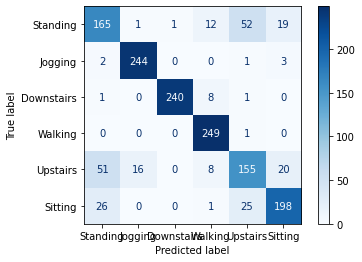

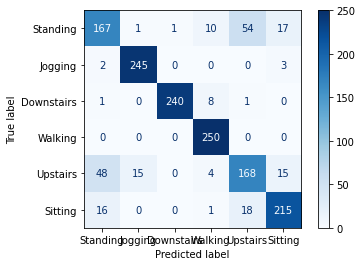

In [29]:
y_pred = svm.predict(Data_Test)
y_pred_scaled  = svm_scaled.predict(Data_Test_scaled)

sc = accuracy_score(Label_Test, y_pred)
plot_confusion_matrix(svm, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ", sc)
sc_scaled = accuracy_score(Label_Test, y_pred_scaled)
plot_confusion_matrix(svm_scaled, Data_Test_scaled, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                                                   cmap=plt.cm.Blues)
print("score donnees scale : ", sc_scaled)
                      

In [30]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [8], 
              'gamma': ['scale'],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid)#, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X, y)
print("param    ",grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("\n\n estim",    grid.best_estimator_)

param     {'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}


 estim SVC(C=8)


score :  0.8953333333333333


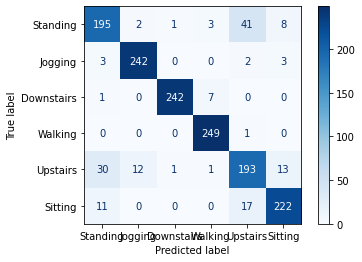

In [31]:
pred = grid.predict(Data_Test)
svm3 = accuracy_score(Label_Test, pred)
plot_confusion_matrix(grid, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ", svm3)
#si trop de paramètre on surapprend

### Classification spectrale 

In [39]:
DataFull = np.vstack((Data_App,Data_Test))
LabelFull = np.vstack((Label_App,Label_Test))

In [ ]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize').fit(DataFull)
print(clustering.labels_,clustering)
clustering3 = accuracy_score(LabelFull,clustering.labels_)
print(confusion_matrix(LabelFull,clustering.labels_),clustering3)

In [34]:
clustering3 = "trop long"

### Adaboost 

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),algorithm="SAMME",n_estimators=200,learning_rate=0.5)
clf.fit(Data_App,Label_App)
y_pred = clf.predict(Data_Test)
print(clf.score(Data_Test,Label_Test.ravel()))

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8646666666666667


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = AdaBoostClassifier(RandomForestClassifier(max_depth=6),algorithm="SAMME",n_estimators=200,learning_rate=0.5)
clf.fit(Data_App,Label_App)
y_pred = clf.predict(Data_Test)
adaboost3 = accuracy_score(Label_Test.ravel(),y_pred)
print(adaboost3)

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8986666666666666


### Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=300,max_depth=6,learning_rate=0.5)
gbc.fit(Data_App,Label_App)
gradient3 = gbc.score(Data_Test,Label_Test.ravel())

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingClassifier(n_estimators=300,max_depth=6,learning_rate=0.5),DataFull,LabelFull.ravel(),cv=5)

array([0.88933333, 0.91      , 0.9       , 0.90333333, 0.914     ])

### Extreme gradient boosting 

In [41]:
import xgboost as xgb
param={'max_depth':3,'eta':1,"objective":"multi:softmax","num_class":6,'eval_metric':'merror'}
num_round = 1000
D_train = xgb.DMatrix(Data_App,label=Label_App)
bst = xgb.train(param,D_train, num_round)
D_test = xgb.DMatrix(Data_Test,label=Label_Test)
xgboost3 =  1-float(bst.eval(D_test)[17:])
"score ", xgboost3

('score ', 0.896)

### Forêts aléatoires

In [42]:
from sklearn.ensemble import RandomForestClassifier 
rfc=RandomForestClassifier(max_depth=6,n_estimators=100,criterion="gini",oob_score=True)
rfc.fit(Data_App,Label_App.ravel())

RandomForestClassifier(max_depth=6, oob_score=True)

In [43]:
rfc.score(Data_Test,Label_Test),rfc.oob_score_

(0.7473333333333333, 0.7166666666666667)

In [44]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[200],'max_depth':[25]}
rfc2 = RandomForestClassifier(oob_score=True)
grid3 = GridSearchCV(rfc2,parameters,cv=5)
grid3.fit(Data_App,Label_App.ravel())
rf3 = grid3.score(Data_Test,Label_Test)
grid3.best_params_,grid3.best_estimator_,grid3.best_score_,rf3

({'max_depth': 25, 'n_estimators': 200},
 RandomForestClassifier(max_depth=25, n_estimators=200, oob_score=True),
 0.8761666666666666,
 0.892)

### Réseaux de neurones

In [45]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=300).fit(Data_App, Label_App)

pred= clf.predict(Data_Test)
mlp_sk3 = clf.score(Data_Test, Label_Test)
print("score : ", mlp_sk3)

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score :  0.8586666666666667


In [46]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models, optimizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential
from keras.utils import to_categorical

import pandas as pd 
y_train = to_categorical(Label_App.ravel())
y_test = to_categorical(Label_Test.ravel())

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=90))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))

optim = optimizers.SGD(lr = 0.01)
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(Data_App, Label_App.ravel(), epochs=60, batch_size=10, validation_split=0.25)
plot_training_analysis()
mlp_keras3 = model.evaluate(Data_Test, Label_Test)[1]

Epoch 1/40
450/450 [==============================] - 0s 762us/step - loss: 0.8341 - accuracy: 0.6976 - val_loss: 8.0661 - val_accuracy: 0.0000e+00
Epoch 2/40
450/450 [==============================] - 0s 690us/step - loss: 0.5400 - accuracy: 0.7949 - val_loss: 9.2051 - val_accuracy: 0.0173
Epoch 3/40
450/450 [==============================] - 0s 631us/step - loss: 0.4926 - accuracy: 0.8093 - val_loss: 7.9821 - val_accuracy: 0.0093
Epoch 4/40
450/450 [==============================] - 0s 570us/step - loss: 0.4355 - accuracy: 0.8309 - val_loss: 10.7817 - val_accuracy: 0.0260
Epoch 5/40
450/450 [==============================] - 0s 595us/step - loss: 0.3866 - accuracy: 0.8438 - val_loss: 10.9955 - val_accuracy: 0.0053
Epoch 6/40
450/450 [==============================] - 0s 565us/step - loss: 0.3757 - accuracy: 0.8520 - val_loss: 11.3729 - val_accuracy: 0.0213
Epoch 7/40
450/450 [==============================] - 0s 645us/step - loss: 0.3662 - accuracy: 0.8516 - val_loss: 9.8189 - val_ac

In [48]:
print("score : ", mlp_keras3)

score :  0.6853333115577698


# Cas d'usage n°3 : augmentation de la durée de chaque segment

Classe N° 0
Classe N° 1
Classe N° 2
Classe N° 3
Classe N° 4
Classe N° 5
(6000, 180)
(1500, 180)


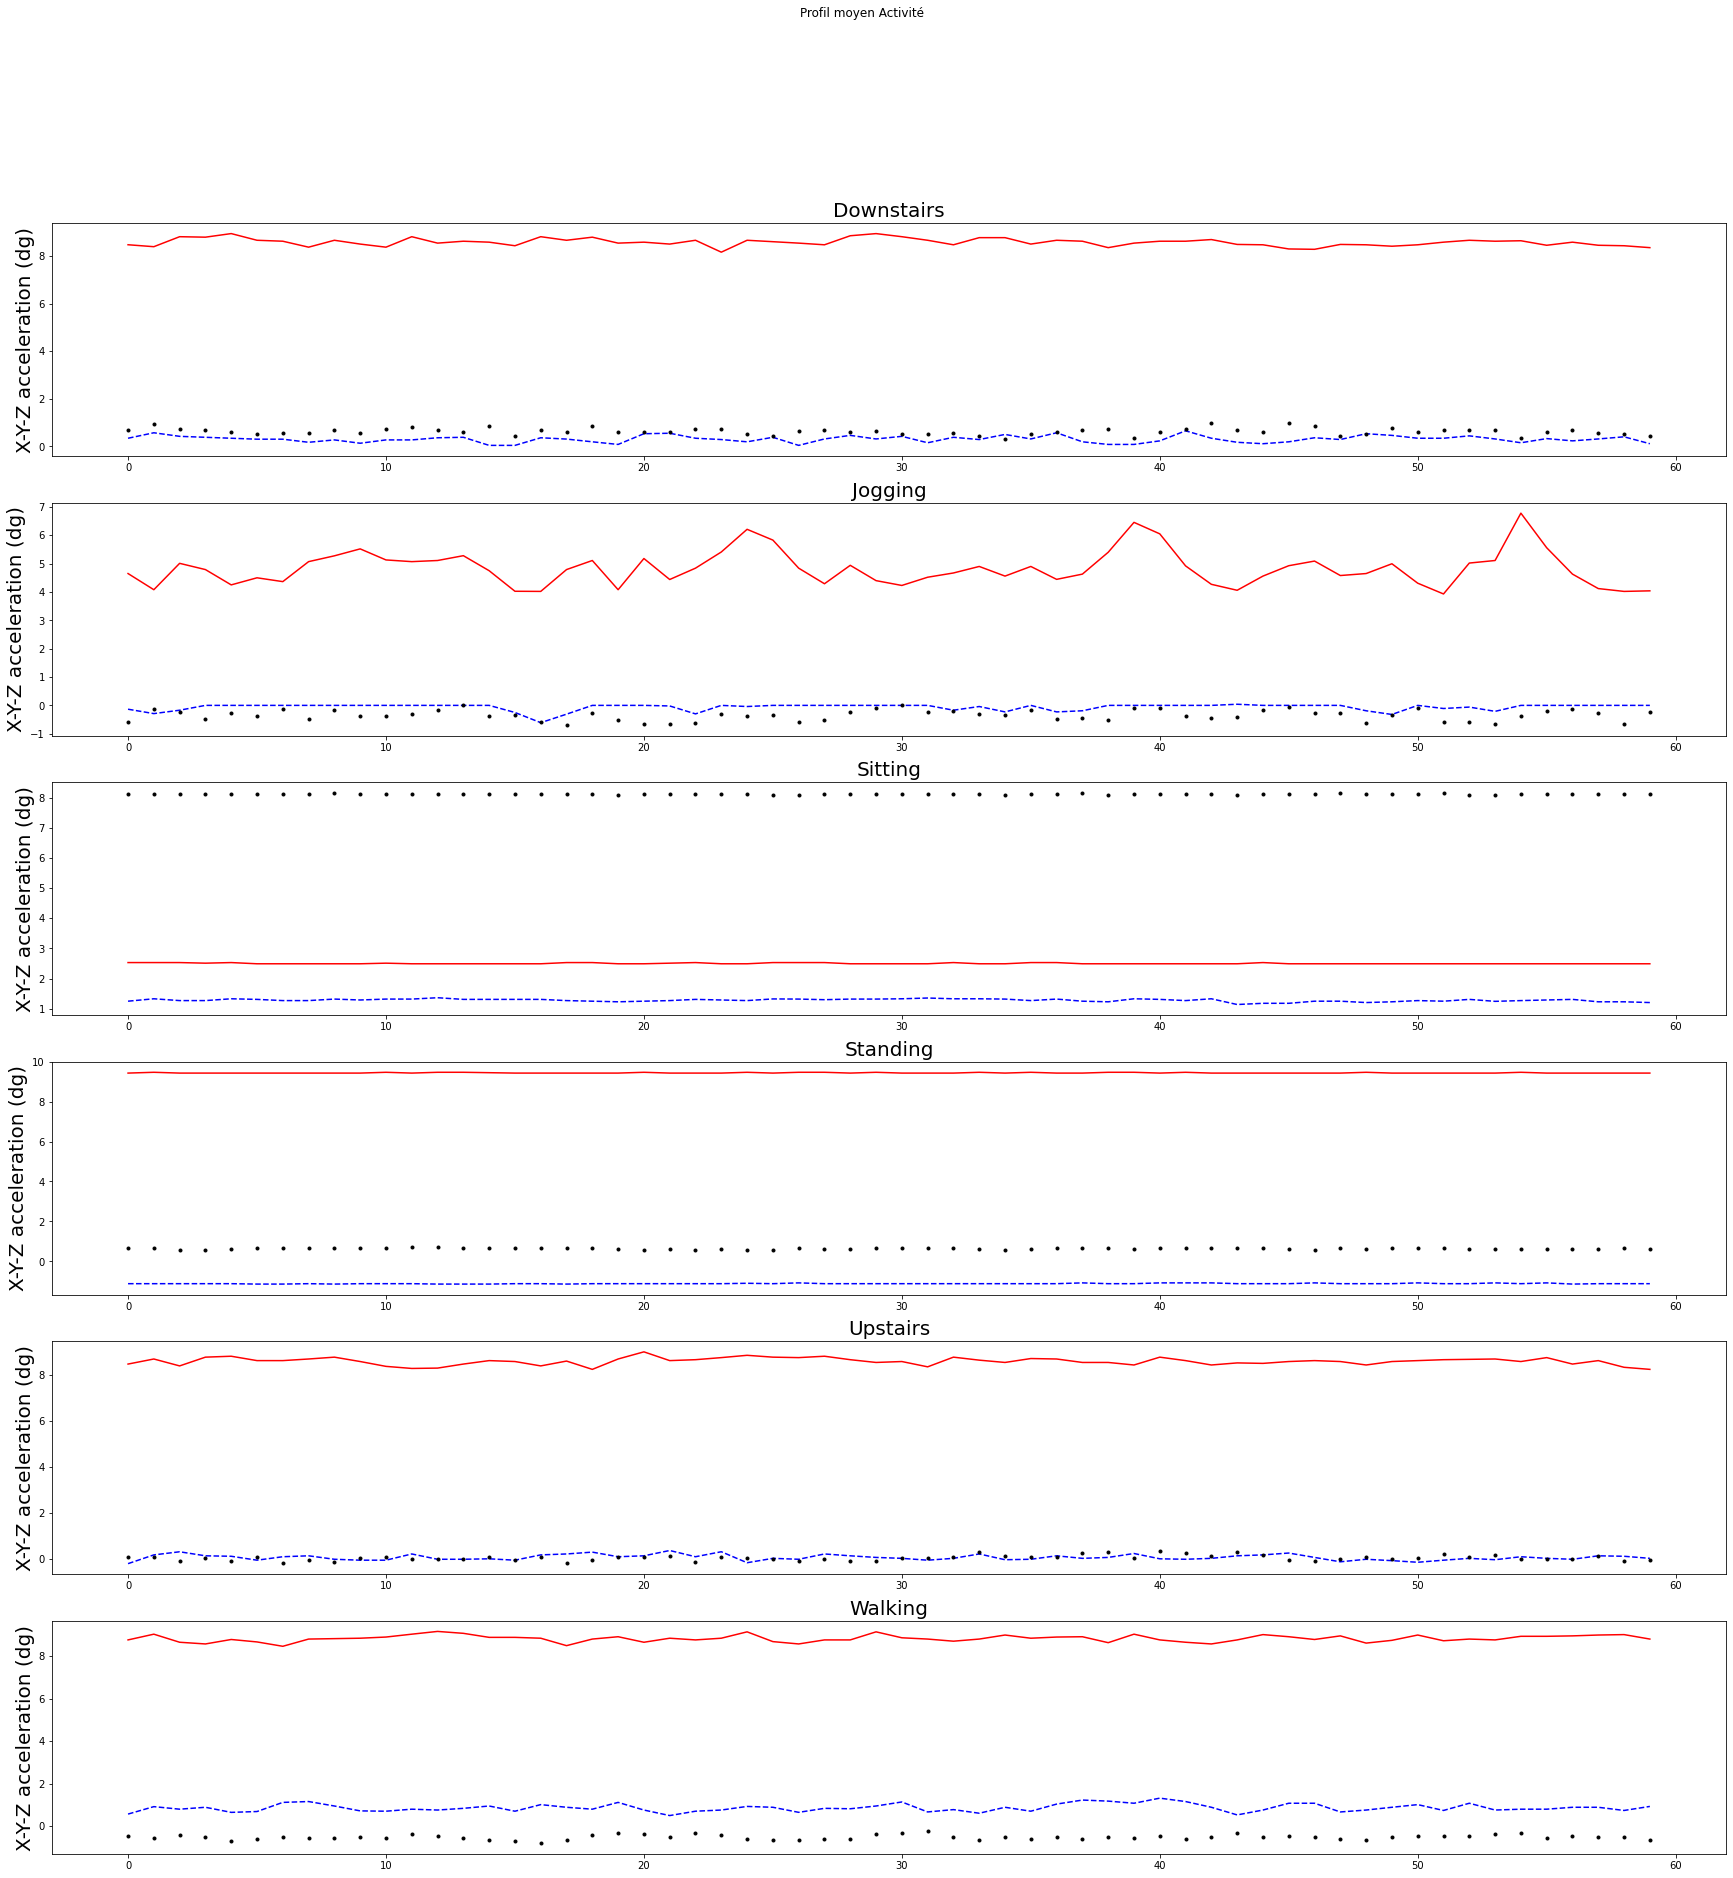

In [49]:
TIME_STEP = 60

# Model
N_CLASSES = 6
N_FEATURES = 3  # x-acceleration, y-acceleration, z-acceleration
SEGMENT_TIME_SIZE = 60
TAILLE_TEST=250
TAILLE_APP=1000
# Chargement des données 
data = pd.read_csv(DATA_PATH, header=None, names=COLUMN_NAMES)
data['z-axis'].replace({';': ''}, regex=True, inplace=True)
data = data.dropna()


data_convoluted = []
labels = []



# Prendre des segments temporels de taille SEGMENT_TIME_SIZE 
# tous les TIME_STEP pour une même activité
for j in range(0,N_CLASSES):
    DataBest=data[data['activity'] == LABELS[j]]
    for i in range(0, len(DataBest) - SEGMENT_TIME_SIZE, TIME_STEP):
        x = DataBest['x-axis'].values[i: i + SEGMENT_TIME_SIZE]
        y = DataBest['y-axis'].values[i: i + SEGMENT_TIME_SIZE]
        z = DataBest['z-axis'].values[i: i + SEGMENT_TIME_SIZE]
        data_convoluted.append([x, y, z])
    # Label de l'activité associée à chaque segment
        label = j
        labels.append(label)


# Conversion numpy
data_convoluted = np.asarray(data_convoluted, dtype=np.float32).transpose(0, 2, 1)

labels = np.asarray(labels, dtype=np.int)
#print("Convoluted data shape: ", data_convoluted.shape)
#print("Labels shape:", labels.shape)


fig, axs = plt.subplots(N_CLASSES,figsize=(30,30))
fig.suptitle('Profil moyen Activité')

profil_median=np.zeros((N_CLASSES,SEGMENT_TIME_SIZE,N_FEATURES))
List_Data_Test=np.zeros(N_CLASSES*TAILLE_TEST)
Data_Test=np.zeros((N_CLASSES*TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))
Data_App=np.zeros((TAILLE_APP*N_CLASSES,SEGMENT_TIME_SIZE*N_FEATURES))
Label_Test=np.zeros((N_CLASSES*TAILLE_TEST,1))
Label_App=np.zeros((N_CLASSES*TAILLE_APP,1))

for i in range(N_CLASSES):
    # Selection des données correspondant à la classe i
    print('Classe N°',i)
    res=np.where(labels==i)
    res=np.array(res)
    res=np.ravel(res)
    taille=res.shape[0]
    
    # Création de la base d'Apprentissage
    tirage=np.random.randint(0,taille,TAILLE_TEST+TAILLE_APP)
    tir_dataApp=data_convoluted[res[tirage[0:TAILLE_APP]],:,:]
    Data_App[i*TAILLE_APP:(i+1)*TAILLE_APP,:]=np.reshape(tir_dataApp,(TAILLE_APP,SEGMENT_TIME_SIZE*N_FEATURES))
    Label_App[i*TAILLE_APP:(i+1)*TAILLE_APP]=i
    
    
    # Création de la base de Test
    List_Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=res[tirage[TAILLE_APP:]]
    Label_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=i
    tir_dataTest=data_convoluted[res[tirage[TAILLE_APP:]],:,:]
    Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST,:]=np.reshape(tir_dataTest,(TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))

    # Affichage du profil temporel moyen de la classe
    class1=np.median(tir_dataApp,axis=0)
    profil_median[i,:,:]=class1
    
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,0],'b--')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,1],'r-')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,2],'k.')
    axs[i].set_ylabel('X-Y-Z acceleration (dg)',fontsize=20)
    axs[i].set_title(LABELS[i], fontsize=20)

print(Data_App.shape)

print(Data_Test.shape)

In [50]:
DataFull = np.vstack((Data_App,Data_Test))
LabelFull = np.vstack((Label_App,Label_Test))

### svm

In [51]:
from sklearn.svm import SVC
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_App_scaled = scaler.fit_transform(Data_App)
Data_Test_scaled = scaler.transform(Data_Test)
X_scaled = Data_App_scaled
X = Data_App
y = np.ravel(Label_App)
from sklearn.svm import SVC

svm = SVC(kernel='rbf').fit(X,y)
svm_scaled = SVC(kernel='rbf').fit(X_scaled,y)
#linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

score :  0.828
score donnees scale :  0.854


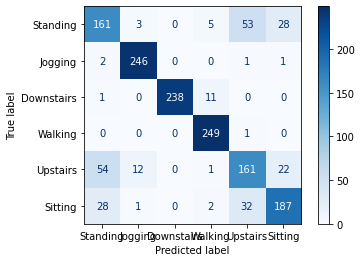

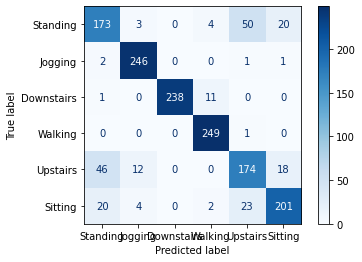

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
y_pred = svm.predict(Data_Test)
y_pred_scaled  = svm_scaled.predict(Data_Test_scaled)

sc = accuracy_score(Label_Test, y_pred)
plot_confusion_matrix(svm, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ",sc)
sc_scaled = accuracy_score(Label_Test, y_pred_scaled)
plot_confusion_matrix(svm_scaled, Data_Test_scaled, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score donnees scale : ", sc_scaled)

In [53]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [8], 
              'gamma': ['scale'],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid)#, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X, y)
print("param    ",grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("\n\n estim",    grid.best_estimator_)

param     {'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}


 estim SVC(C=8)


score :  0.8993333333333333


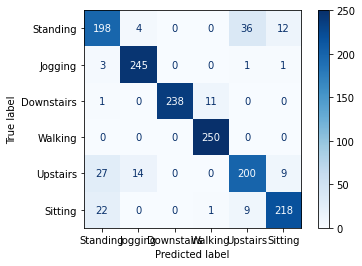

In [54]:
pred = grid.predict(Data_Test)
svm4 = accuracy_score(Label_Test, pred)
plot_confusion_matrix(grid, Data_Test, Label_Test,
                             display_labels={LABELS[j] for j in range(N_CLASSES)},
                             cmap=plt.cm.Blues)
print("score : ", svm4)
#si trop de paramètre on surapprend

### Classification spectrale 

In [ ]:
from sklearn.cluster import SpectralClustering
DataFull = np.vstack((Data_App,Data_Test))
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize').fit(DataFull)
LabelFull = np.vstack((Label_App,Label_Test))
print(clustering.labels_,clustering)
clustering4 = accuracy_score(LabelFull,clustering.labels_)
print(confusion_matrix(LabelFull,clustering.labels_),clustering4)

In [56]:
clustering4 = "trop long"

### AdaBoost

In [57]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),algorithm="SAMME",n_estimators=200,learning_rate=0.5)
clf.fit(Data_App,Label_App)
y_pred = clf.predict(Data_Test)
print(clf.score(Data_Test,Label_Test))

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.854


In [58]:
clf = AdaBoostClassifier(RandomForestClassifier(max_depth=6),algorithm="SAMME",n_estimators=200,learning_rate=0.5)
clf.fit(Data_App,Label_App)
y_pred = clf.predict(Data_Test)
adaboost4 = accuracy_score(Label_Test.ravel(),y_pred)
print(adaboost4)

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.87


### Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=300,max_depth=6,learning_rate=0.5)
gbc.fit(Data_App,Label_App)
gradient4=gbc.score(Data_Test,Label_Test.ravel())

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingClassifier(n_estimators=300,max_depth=6,learning_rate=0.5),DataFull,LabelFull.ravel(),cv=5)

### Extreme gradient boosting 

In [61]:
import xgboost as xgb
param={'max_depth':6,'eta':1,"objective":"multi:softmax","num_class":6,'eval_metric':'merror'}
num_round = 1000
D_train = xgb.DMatrix(Data_App,label=Label_App)
bst = xgb.train(param,D_train, num_round)
D_test = xgb.DMatrix(Data_Test,label=Label_Test)
xgboost4 =  1-float(bst.eval(D_test)[17:])
"score ",xgboost4

('score ', 0.871333)

### Forêts aléatoires

In [62]:
from sklearn.ensemble import RandomForestClassifier 
rfc=RandomForestClassifier(max_depth=6,n_estimators=100,criterion="gini",oob_score=True)
rfc.fit(Data_App,Label_App)

/home/n7student/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=6, oob_score=True)

In [63]:
rfc.score(Data_Test,Label_Test),rfc.oob_score_

(0.7453333333333333, 0.7211666666666666)

In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[200],'max_depth':[25]}
rfc2 = RandomForestClassifier(oob_score=True)
grid3 = GridSearchCV(rfc2,parameters,cv=5)
grid3.fit(Data_App,Label_App.ravel())
rf4 = grid3.score(Data_Test,Label_Test)
grid3.best_params_,grid3.best_estimator_,grid3.best_score_,rf4

({'max_depth': 25, 'n_estimators': 200},
 RandomForestClassifier(max_depth=25, n_estimators=200, oob_score=True),
 0.8738333333333334,
 0.8913333333333333)

### Réseaux de neurones

In [67]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=300).fit(Data_App, Label_App)

pred= clf.predict(Data_Test)
mlp_sk4 = clf.score(Data_Test, Label_Test)
print("score : ", mlp_sk4)

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score :  0.872


In [70]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models, optimizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential
from keras.utils import to_categorical

import pandas as pd 
y_train = to_categorical(Label_App.ravel())
y_test = to_categorical(Label_Test.ravel())

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=180))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))

optim = optimizers.SGD(lr = 0.01)
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                2896      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 102       
Total params: 4,070
Trainable params: 4,070
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
450/450 [==============================] - 0s 774us/step - loss: 0.8617 - accuracy: 0.6762 - val_loss: 6.3503 - val_accuracy: 0.0000e+00
Epoch 2/40
450/450 [==============================] - 0s 684us/step - loss: 0.6287 - accuracy: 0.7569 - val_loss: 7.1065 - val_accuracy: 6.6667e-04
Epoch 3/40
450/450 [==============================] - 0s 715us/step - loss: 0.5516 - accuracy: 0.7822 - val_loss: 7.3219 - val_accuracy: 0.0013
Epoch 4/40
450/450 [==============================] - 0s 668us/step - loss: 0.4560 - accuracy: 0.8196 - val_loss: 8.7624 - val_accuracy: 6.6667e-04
Epoch 5/40
450/450 [==============================] - 0s 683us/step - loss: 0.4837 - accuracy: 0.8151 - val_loss: 9.3218 - val_accuracy: 0.0107
Epoch 6/40
450/450 [==============================] - 0s 622us/step - loss: 0.3869 - accuracy: 0.8420 - val_loss: 10.6573 - val_accuracy: 0.0200
Epoch 7/40
450/450 [==============================] - 0s 709us/step - loss: 0.3774 - accuracy: 0.8482 - val_loss: 11.9474 -

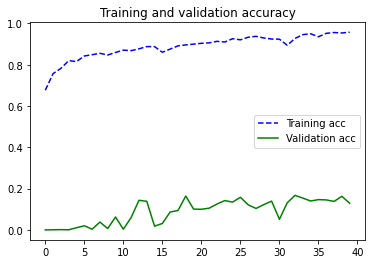

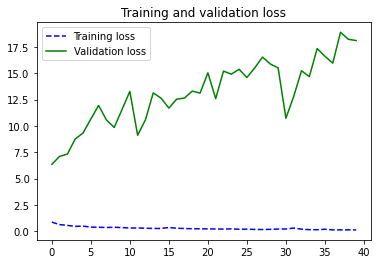

47/47 [==============================] - 0s 716us/step - loss: 5.0312 - accuracy: 0.6733
score :  0.6733333468437195


In [71]:
history = model.fit(Data_App, Label_App.ravel(), epochs=40, batch_size=10, validation_split=0.25)
plot_training_analysis()
mlp_keras4 = model.evaluate(Data_Test, Label_Test)[1]
print("score : ", mlp_keras4)

# Etude fréquentielle : les données deviennent des transformées de Fourier 

Dans ce qui suit on va appliquer une transformée de Fourier fft à toutes nos données. On pourra alors comparer l'effet de travailler plutôt sur les fréquences. On va donc appliquer à ces données modifiées les modèles définis précédemment.

Classe N° 0
Classe N° 1
Classe N° 2
(1200, 180)
(450, 180)


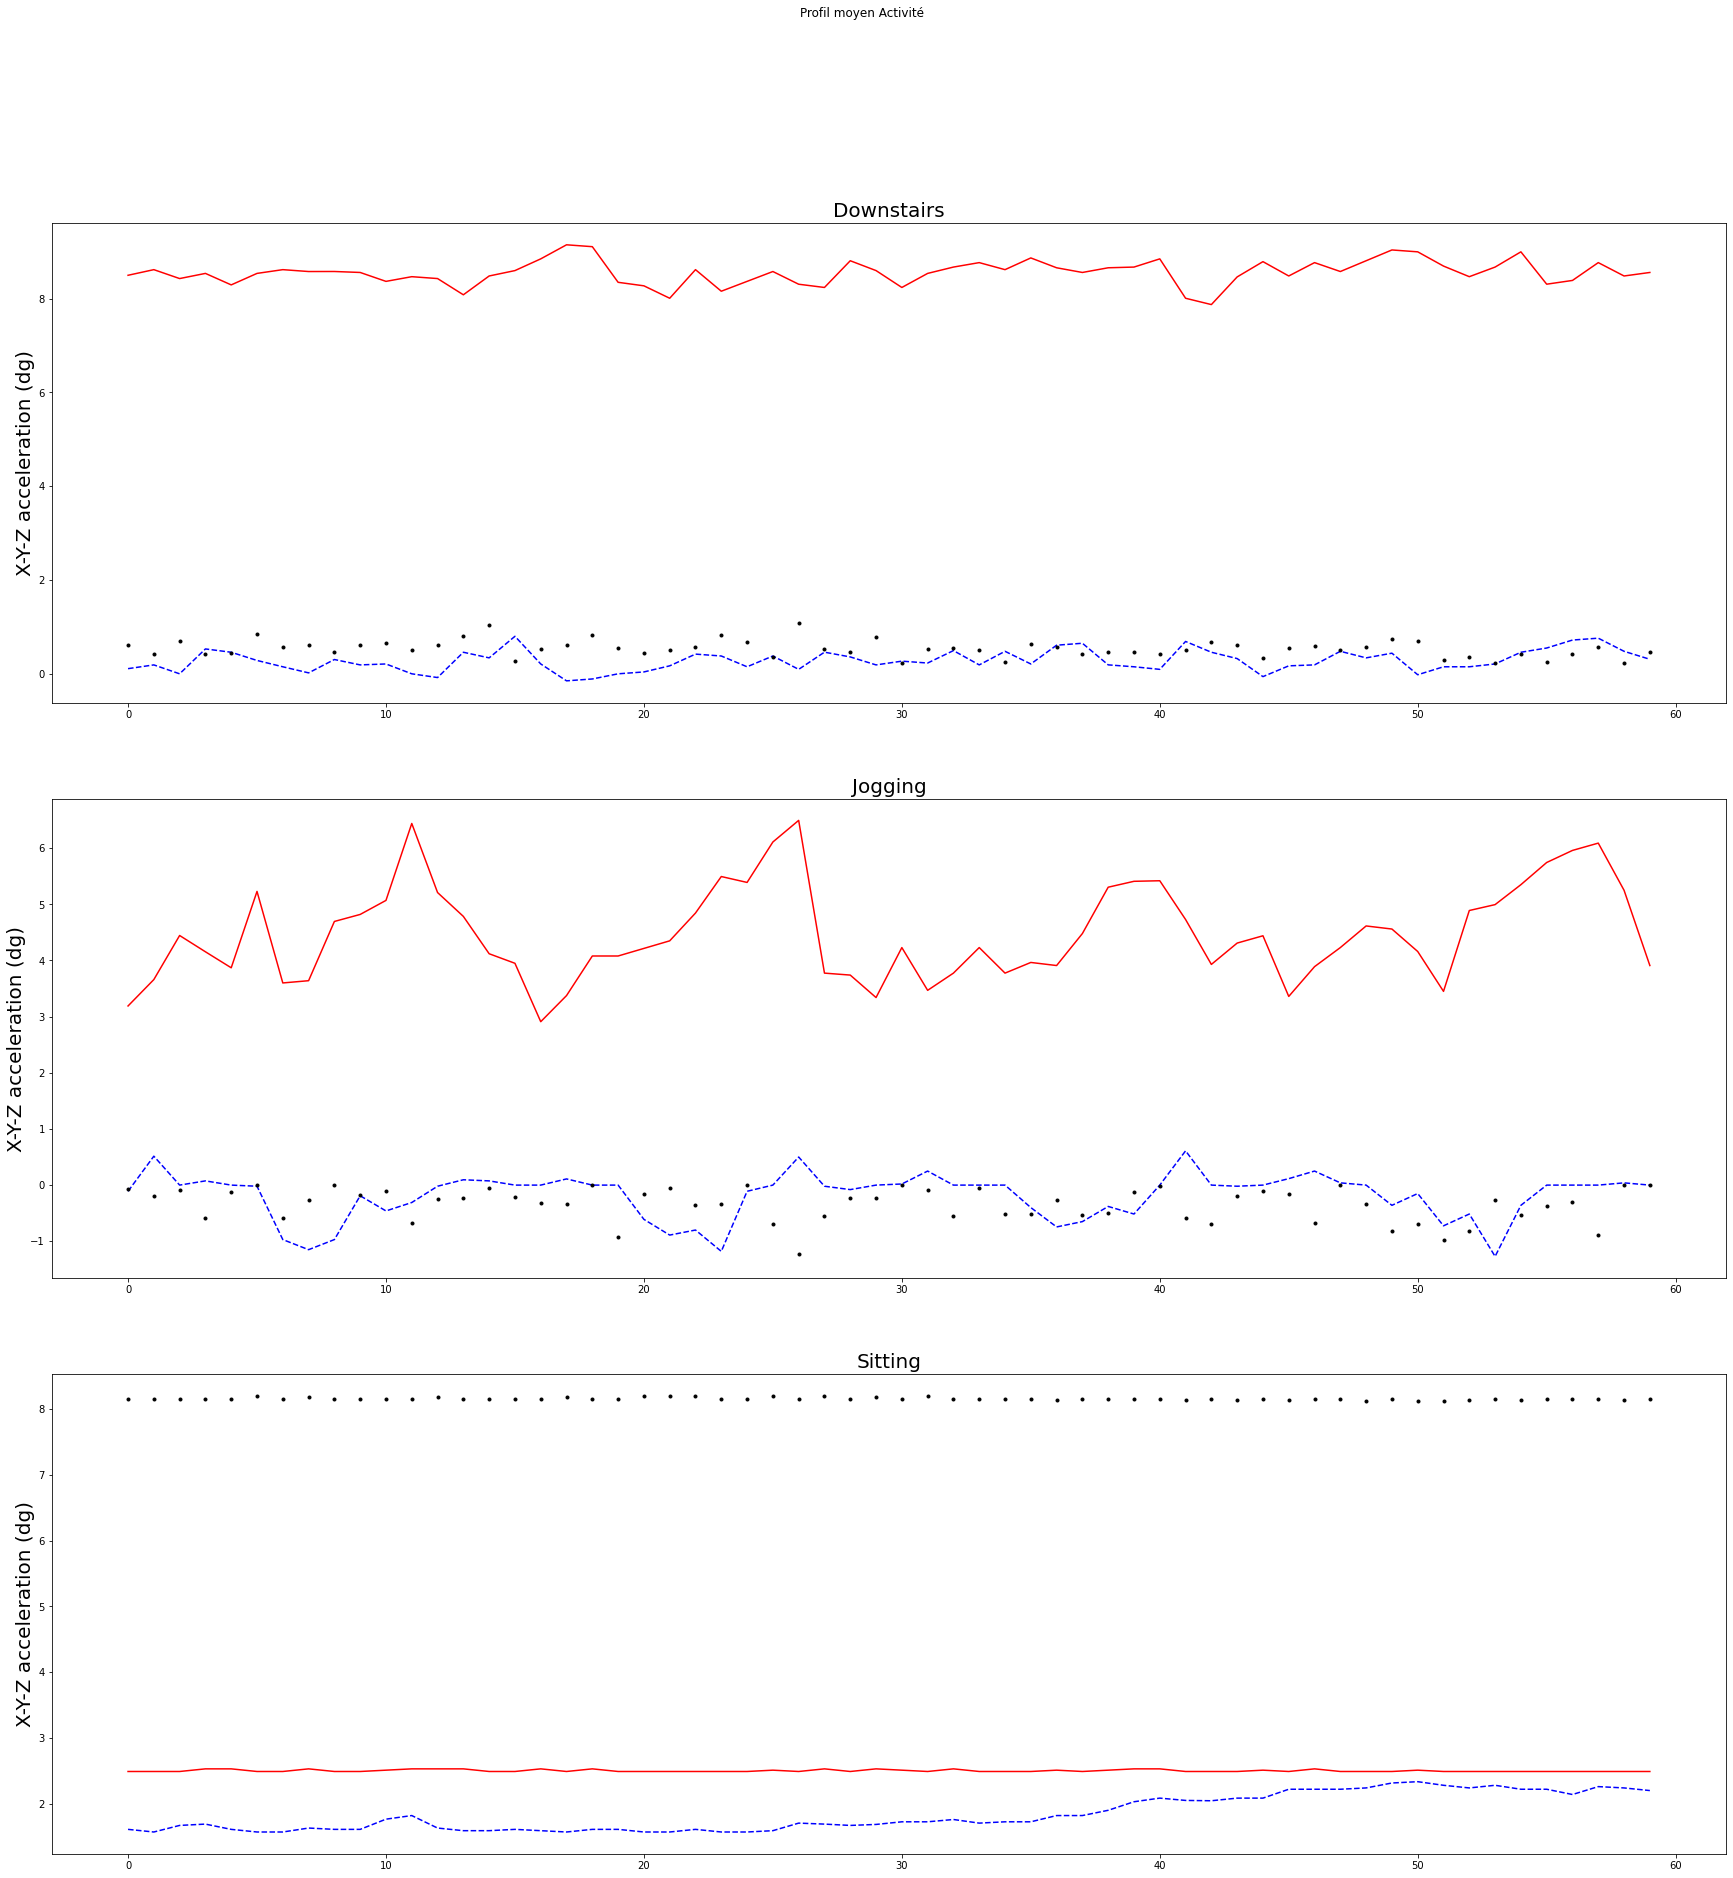

In [114]:
TIME_STEP = 60

# Model
N_CLASSES = 3
N_FEATURES = 3  # x-acceleration, y-acceleration, z-acceleration
SEGMENT_TIME_SIZE = 60
TAILLE_TEST=150
TAILLE_APP=400
# Chargement des données 
data = pd.read_csv(DATA_PATH, header=None, names=COLUMN_NAMES)
data['z-axis'].replace({';': ''}, regex=True, inplace=True)
data = data.dropna()


data_convoluted = []
labels = []



# Prendre des segments temporels de taille SEGMENT_TIME_SIZE 
# tous les TIME_STEP pour une même activité
for j in range(0,N_CLASSES):
    DataBest=data[data['activity'] == LABELS[j]]
    for i in range(0, len(DataBest) - SEGMENT_TIME_SIZE, TIME_STEP):
        x = DataBest['x-axis'].values[i: i + SEGMENT_TIME_SIZE]
        y = DataBest['y-axis'].values[i: i + SEGMENT_TIME_SIZE]
        z = DataBest['z-axis'].values[i: i + SEGMENT_TIME_SIZE]
        data_convoluted.append([x, y, z])
    # Label de l'activité associée à chaque segment
        label = j
        labels.append(label)


# Conversion numpy
data_convoluted = np.asarray(data_convoluted, dtype=np.float32).transpose(0, 2, 1)

labels = np.asarray(labels, dtype=np.int)
#print("Convoluted data shape: ", data_convoluted.shape)
#print("Labels shape:", labels.shape)


fig, axs = plt.subplots(N_CLASSES,figsize=(30,30))
fig.suptitle('Profil moyen Activité')

profil_median=np.zeros((N_CLASSES,SEGMENT_TIME_SIZE,N_FEATURES))
List_Data_Test=np.zeros(N_CLASSES*TAILLE_TEST)
Data_Test=np.zeros((N_CLASSES*TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))
Data_App=np.zeros((TAILLE_APP*N_CLASSES,SEGMENT_TIME_SIZE*N_FEATURES))
Label_Test=np.zeros((N_CLASSES*TAILLE_TEST,1))
Label_App=np.zeros((N_CLASSES*TAILLE_APP,1))

for i in range(N_CLASSES):
    # Selection des données correspondant à la classe i
    print('Classe N°',i)
    res=np.where(labels==i)
    res=np.array(res)
    res=np.ravel(res)
    taille=res.shape[0]
    
    # Création de la base d'Apprentissage
    tirage=np.random.randint(0,taille,TAILLE_TEST+TAILLE_APP)
    tir_dataApp=data_convoluted[res[tirage[0:TAILLE_APP]],:,:]
    Data_App[i*TAILLE_APP:(i+1)*TAILLE_APP,:]=np.reshape(tir_dataApp,(TAILLE_APP,SEGMENT_TIME_SIZE*N_FEATURES))
    Label_App[i*TAILLE_APP:(i+1)*TAILLE_APP]=i
    
    
    # Création de la base de Test
    List_Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=res[tirage[TAILLE_APP:]]
    Label_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST]=i
    tir_dataTest=data_convoluted[res[tirage[TAILLE_APP:]],:,:]
    Data_Test[i*TAILLE_TEST:(i+1)*TAILLE_TEST,:]=np.reshape(tir_dataTest,(TAILLE_TEST,SEGMENT_TIME_SIZE*N_FEATURES))

    # Affichage du profil temporel moyen de la classe
    class1=np.median(tir_dataApp,axis=0)
    profil_median[i,:,:]=class1
    
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,0],'b--')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,1],'r-')
    axs[i].plot(range(SEGMENT_TIME_SIZE),class1[:,2],'k.')
    axs[i].set_ylabel('X-Y-Z acceleration (dg)',fontsize=20)
    axs[i].set_title(LABELS[i], fontsize=20)

print(Data_App.shape)

print(Data_Test.shape)

In [115]:
Data_freq = []
Data_freq_test = []
for indiv in Data_App :
    X = np.fft.fft(indiv)
#    freq = np.fft.fftfreq(X.size)  # Fréquences de la transformée de Fourier
    Data_freq.append(np.abs(X))
Data_freq = np.array(Data_freq)
for indiv in Data_Test :
    X = np.fft.fft(indiv)  # Fréquences de la transformée de Fourier
    Data_freq_test.append(np.abs(X))
Data_freq_test = np.array(Data_freq_test)


### SVM

In [116]:
from sklearn.svm import SVC
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_freq_scaled = scaler.fit_transform(Data_freq)
Data_freq_Test_scaled = scaler.transform(Data_freq_test)
X_scaled = Data_freq_scaled
X = Data_freq
y = np.ravel(Label_App)
from sklearn.svm import SVC

svm = SVC(kernel='rbf').fit(X,y)
svm_scaled = SVC(kernel='rbf').fit(X_scaled,y)
#linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
y_pred = svm.predict(Data_freq_test)
y_pred_scaled  = svm_scaled.predict(Data_freq_Test_scaled)

sc = accuracy_score(Label_Test, y_pred)
mat = confusion_matrix(Label_Test,y_pred)

print("score : ", sc)
sc_scaled = accuracy_score(Label_Test, y_pred_scaled)
mat_scaled = confusion_matrix(Label_Test,y_pred_scaled)

print("score donnees scale : ",sc_scaled)

score :  0.9933333333333333
score donnees scale :  0.9933333333333333


In [118]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [8], 
              'gamma': ['scale'],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid)#, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X, y)
print("param    ",grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("\n\n estim",    grid.best_estimator_)

param     {'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}


 estim SVC(C=8)


In [119]:
pred = grid.predict(Data_freq_test)
svm5 = accuracy_score(Label_Test, pred)
mat_gd = confusion_matrix(Label_Test,pred)
print(svm5,"\n",mat_gd)

0.9977777777777778 
 [[150   0   0]
 [  1 149   0]
 [  0   0 150]]


In [81]:
clustering5 = "trop long"

### Adaboost

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),algorithm="SAMME",n_estimators=200,learning_rate=0.5)
clf.fit(Data_freq,Label_App)
y_pred = clf.predict(Data_freq_test)
adaboost5 = accuracy_score(Label_Test.ravel(),y_pred)
print(adaboost5)

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.98


### Gradient boosting 

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
DataFull = np.vstack((Data_freq,Data_freq_test))
LabelFull = np.vstack((Label_App,Label_Test))
gbc=GradientBoostingClassifier(n_estimators=300,max_depth=6,learning_rate=0.5)
gbc.fit(Data_freq,Label_App)
gradient5 = gbc.score(Data_freq_test,Label_Test.ravel())

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingClassifier(n_estimators=300,max_depth=6,learning_rate=0.5),DataFull,LabelFull.ravel(),cv=5)

### XGBoost 

In [84]:
import xgboost as xgb
param={'max_depth':6,'eta':1,"objective":"multi:softmax","num_class":6,'eval_metric':'merror'}
num_round = 1000
D_train = xgb.DMatrix(Data_freq,label=Label_App)
bst = xgb.train(param,D_train, num_round)
D_test = xgb.DMatrix(Data_freq_test,label=Label_Test)
xgboost5 =  1-float(bst.eval(D_test)[17:])
"score ",xgboost5

('score ', 0.977778)

### Forêts aléatoires 

In [85]:
from sklearn.ensemble import RandomForestClassifier 
rfc=RandomForestClassifier(max_depth=6,n_estimators=100,criterion="gini",oob_score=True)
rfc.fit(Data_App,Label_App)
rfc.score(Data_Test,Label_Test),rfc.oob_score_

/home/n7student/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


(0.9377777777777778, 0.9166666666666666)

In [86]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[200],'max_depth':[25]}
rfc2 = RandomForestClassifier(oob_score=True)
grid3 = GridSearchCV(rfc2,parameters,cv=5)
grid3.fit(Data_freq,Label_App.ravel())
rf5 = grid3.score(Data_freq_test,Label_Test)
grid3.best_params_,grid3.best_estimator_,grid3.best_score_,rf5

({'max_depth': 25, 'n_estimators': 200},
 RandomForestClassifier(max_depth=25, n_estimators=200, oob_score=True),
 0.9800000000000001,
 0.98)

### Réseaux de neurones 

In [87]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=300).fit(Data_freq, Label_App)

pred= clf.predict(Data_freq_test)
mlp_sk5 = clf.score(Data_freq_test, Label_Test)
print("score : ", mlp_sk5)

/home/n7student/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score :  0.9777777777777777


In [93]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models, optimizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential
from keras.utils import to_categorical

import pandas as pd 
y_train = to_categorical(Label_App.ravel())
y_test = to_categorical(Label_Test.ravel())

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=180))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

optim = optimizers.SGD(lr = 0.01)
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                2896      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 51        
Total params: 4,019
Trainable params: 4,019
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model.fit(Data_freq, Label_App.ravel(), epochs=40, batch_size=10, validation_split=0.25)

Epoch 1/40
90/90 [==============================] - 0s 2ms/step - loss: 2.9351 - accuracy: 0.6122 - val_loss: 1.2664 - val_accuracy: 0.0133
Epoch 2/40
90/90 [==============================] - 0s 775us/step - loss: 0.5855 - accuracy: 0.8478 - val_loss: 1.4126 - val_accuracy: 0.0000e+00
Epoch 3/40
90/90 [==============================] - 0s 868us/step - loss: 0.6865 - accuracy: 0.7133 - val_loss: 1.5590 - val_accuracy: 0.0000e+00
Epoch 4/40
90/90 [==============================] - 0s 851us/step - loss: 0.5183 - accuracy: 0.8344 - val_loss: 1.6565 - val_accuracy: 0.0000e+00
Epoch 5/40
90/90 [==============================] - 0s 874us/step - loss: 0.4566 - accuracy: 0.8522 - val_loss: 1.7406 - val_accuracy: 0.0000e+00
Epoch 6/40
90/90 [==============================] - 0s 854us/step - loss: 0.4133 - accuracy: 0.8689 - val_loss: 1.8101 - val_accuracy: 0.0000e+00
Epoch 7/40
90/90 [==============================] - 0s 828us/step - loss: 0.3865 - accuracy: 0.8711 - val_loss: 1.8534 - val_accur

In [95]:
mlp_keras5 = model.evaluate(Data_freq_test, Label_Test)[1]

15/15 [==============================] - 0s 745us/step - loss: 0.6906 - accuracy: 0.6489


# Fin de l'étude 
Pour conclure, vous trouverez ci-dessous un tableau qui permet de comparer tous les modèles en termes de performances.Ce projet nous a permis d'explorer plusieurs dimensions du machine learning, et de voir à quel point certains modèles, lorsqu'ils sont bien optimisés, peuvent être rapide et efficace. Il a également été intéressant de mettre en parallèle une étude fréquentielle et de constater que les modèles continuent à bien prédire sous cette autre dimension. 

In [107]:
from IPython.display import Markdown as md

md("|                                            sizes \ models                                            | SVM | Classification spectrale | Adaboost | Gradient boosting | XGBoost | Forêt aléatoire | MLP sklearn | MLP keras |\n\
|:----------------------------------------------------------------------------------------------------:|:---:|:------------------------:|:--------:|:-----------------:|:-------:|:---------------:|:-----------:|:---------:|\n\
|                  Data_App = 150 Label_App = 40 N_CLASSES = 3  SEGMENT_TIME_SIZE = 30                 |  {} |            {}            |    {}    |         {}        |    {}   |        {}       |      {}     |     {}    |\n\
|                 Data_App = 1000 Label_App = 250 N_CLASSES = 3  SEGMENT_TIME_SIZE = 30                |  {} |            {}            |    {}    |         {}        |    {}   |        {}       |      {}     |     {}    |\n\
|                 Data_App = 1000 Label_App = 250 N_CLASSES = 6 SEGMENT_TIME_SIZE = 30                 |  {} |            {}            |    {}    |         {}        |    {}   |        {}       |      {}     |     {}    |\n\
|                 Data_App = 700 Label_App = 150 N_CLASSES = 3  SEGMENT_TIME_SIZE = 60                 |  {} |            {}            |    {}    |         {}        |    {}   |        {}       |      {}     |     {}    |\n\
| Analyse fréquentielle avec :  Data_App = 400 Label_App = 150 N_CLASSES = 3  SEGMENT_TIME_SIZE = 30  |  {} |            {}            |    {}    |         {}        |    {}   |        {}       |      {}     |     {}    |".format(0.95,clustering1,0.94,0.93,0.89,0.94,0.875,0.87,0.98,clustering2,0.98,0.975,0.97,0.97,0.95,0.94,0.895,clustering3,0.9,0.89,0.9,0.89,0.85,0.68,0.89,clustering4,0.87,0.9,0.87,0.89,0.87,0.67,0.99,clustering5,0.98,0.98,0.97,0.98,0.97,0.64))

|                                            sizes \ models                                            | SVM | Classification spectrale | Adaboost | Gradient boosting | XGBoost | Forêt aléatoire | MLP sklearn | MLP keras |
|:----------------------------------------------------------------------------------------------------:|:---:|:------------------------:|:--------:|:-----------------:|:-------:|:---------------:|:-----------:|:---------:|
|                  Data_App = 150 Label_App = 40 N_CLASSES = 3  SEGMENT_TIME_SIZE = 30                 |  0.95 |            trop long            |    0.94    |         0.93        |    0.89   |        0.94       |      0.875     |     0.87    |
|                 Data_App = 1000 Label_App = 250 N_CLASSES = 3  SEGMENT_TIME_SIZE = 30                |  0.98 |            trop long            |    0.98    |         0.975        |    0.97   |        0.97       |      0.95     |     0.94    |
|                 Data_App = 1000 Label_App = 250 N_CLASSES = 6 SEGMENT_TIME_SIZE = 30                 |  0.895 |            trop long            |    0.9    |         0.89        |    0.9   |        0.89       |      0.85     |     0.68    |
|                 Data_App = 700 Label_App = 150 N_CLASSES = 3  SEGMENT_TIME_SIZE = 60                 |  0.89 |            trop long            |    0.87    |         0.9        |    0.87   |        0.89       |      0.87     |     0.67    |
| Analyse fréquentielle avec :  Data_App = 400 Label_App = 150 N_CLASSES = 3  SEGMENT_TIME_SIZE = 30  |  0.99 |            trop long            |    0.98    |         0.98        |    0.97   |        0.98       |      0.97     |     0.64    |